In [ ]:
pip install SQLAlchemy==1.4.46


In [ ]:
pip install pandasql

In [ ]:
pip install statsmodels


In [146]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy.io
from utils import *
import hvplot.pandas
import panel as pn
import warnings
import statsmodels.api as sm
import scipy.stats as stats
from mpl_toolkits import mplot3d
import openpyxl

from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, ConfusionMatrixDisplay

# <font color=33FFF9>**Introduction to Booklet**</font>

<h3 style="font-family:Georgia;"> Introduction</h3>
<p> This documentation is for my thesis project on aircraft design and analysis. This document serves as a comprehensive repository of all the information, work, code, and notes accumulated throughout the course of my research.</p>

<h3 style="font-family:Georgia;"> Purpose</h3>
Within this documentation, you will discover the following key components:

<ul>
    <li><strong>Research Objectives:</strong> Clearly defined goals and objectives guiding the research project.</li>
    <li><strong>Literature Review:</strong> A comprehensive summary of key findings from relevant literature and research in the field of aircraft design and analysis.</li>
    <li><strong>Data Sources:</strong> Documentation of the sources of data utilized, whether obtained from publicly available datasets, industry reports, or proprietary sources.</li>
    <li><strong>Model Development:</strong> Detailed explanation of the development and implementation of any machine learning models or algorithms used in the research, including parameter tuning and validation techniques.</li>
    <li><strong>Results and Analysis:</strong> Presentation of the findings and analysis, including insights or trends discovered from the data.</li>
    <li><strong>References:</strong> A comprehensive list of references cited throughout the documentation, following a consistent citation style.</li>
    <li><strong>Important Notes:</strong> Insights into the rationale behind specific decisions made during the research process and any noteworthy considerations.</li>
</ul>

<h3 style="font-family:Georgia;"> Color Coding</h3>
<ul>
<li style="color: #33FFF9;"><strong>Title:</strong> #33FFF9</li>
<li style="color: #CE33FF;"><strong>Parameters Section:</strong> #CE33FF</li>
<li style="color: #F4AC12;"><strong>Subsections:</strong> #F4AC12</li>
<li style="color: #12F4B3;"><strong>Subsubsections:</strong> #12F4B3</li>
<li style="color: #F4128A;"><strong>Model Architecture:</strong> #F4128A</li>
<li style="color: #FF5533;"><strong>Important Notes:</strong> #FF5533</li>
<li style="color: #374DC8;"><strong>Parameter Name:</strong> #374DC8</li>
<li style="color: #44C837;"><strong>Next Steps:</strong> #44C837</li>
<li style="color: #C837A0;"><strong>Explanation:</strong> #C837A0</li>
</ul>

# <font color=33FFF9>**Important Website & Links**</font>

<ul>
    <li> The following link contains really good notes regarding aircraft design: <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/HOOU/"> HAW-Hamburg Aircraft Design</a> </li>
    <li> For detail lectures regarding aircraft design, you can also check the following courses offered by Luftfahrzeugbau und Leichtbau at TU Berlin: <strong> Flugzeugentwurf I </strong> & <strong> Flugzeugentwurf II </strong> </li>
</ul>

# <font color=33FFF9>**Theory - Introduction to Aircraft Design**</font>

## <font style="color: #F4AC12;"> <strong>Airplane Parts & Functions </strong></font>

The diagram below shows the Airplane parts <a href="https://www1.grc.nasa.gov/beginners-guide-to-aeronautics/airplane-parts-function/"> [3]</a><br>
<p align="center">
  <img src="images/Airplane_Parts.png" alt="Airplane Parts" width="500"/>
</p>

## <font style="color: #F4AC12;"> <strong>Requirements, Parameters, Constraints and Objectives  </strong></font>

All the notes below are taken from the following link: <a href="https://www1.grc.nasa.gov/beginners-guide-to-aeronautics/airplane-parts-function/"> HAW-Hamburg Aircraft Design - Introduction Lecture</a><br>

<p>
The following requirements, at least, should be met when aircraft design begins: 
<ul>
    <li> Payload</li>
    <li> Range</li>
    <li> Mach Number</li>
</ul>

The key design parameters are: 
<ul>
    <li> Take-off mass</li>
    <li> Fuel mass</li>
    <li> Operating empty mass</li>
    <li> Wing area</li>
    <li> Take-off thrust</li>
    </ul>

In principle, the aim of aircraft design is to create something new through synthesis. This contrasts with the analysis of the aircraft by a large number of specialized disciplines in aircraft construction. Flight mechanics, as an example of one of the disciplines, focuses on aircraft geometry and uses this to determine flight performance and flight characteristics. 

</p>



## <font style="color: #F4AC12;"> <strong>Aircraft Design Sequence </strong></font>


All the notes below are taken from the following link: <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/HOOU/AircraftDesign_2_DesignSequenz.pdf"> HAW-Hamburg Aircraft Design - Aircraft Design Sequence</a><br>

Really good notes regarding the sequence of aircraft design. We will later use the sequence provided here to train our ML models one by one until we had to train the model for "Range" & other "Flight Mechanics" parameters.

# <font color=33FFF9>**Standard Units In Aviation**</font>
<p> The standard SI Units are taken from the following link: <a href=https://en.wikipedia.org/wiki/International_Civil_Aviation_Organization">Civil Aviation SI Units</a>

<table style="width:100%">
  <tr>
    <th>Parameter</th>
    <th>Unit</th>
  </tr>
  <tr>
    <td>Speed</td>
    <td>km/h</td>
  </tr>
  <tr>
    <td>Distance</td>
    <td>km</td>
  </tr>
  <tr>
    <td>Altitude</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Weight</td>
    <td>kg</td>
  </tr>
  <tr>
    <td>Fuel Capacity	</td>
    <td>Liters (L)</td>
  </tr>
  <tr>
    <td>Fuel Weight	</td>
    <td>kg</td>
  </tr>
  <tr>
    <td>Thrust</td>
    <td>Newtons (N)</td>
  </tr>
  <tr>
    <td>Temperature</td>
    <td>Celsius (°C)</td>
  </tr>
  <tr>
    <td>Acceleration</td>
    <td>Meters per second squared (m/s²)</td>
  </tr>
  <tr>
    <td>Force</td>
    <td>Newtons (N)</td>
  </tr>
  <tr>
    <td>Density</td>
    <td>Kilograms per cubic meter (kg/m³)</td>
  </tr>
  <tr>
    <td>Length</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Width</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Wing Span</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Thrust/Shaft Power</td>
    <td>Newtons (N)</td>
  </tr>
  <tr>
    <td>Wing Loading</td>
    <td>N/m²</td>
  </tr>
  <tr>
    <td>Tail Loading</td>
    <td>N/m²</td>
  </tr>
  <tr>
    <td>Rate of Climb (ROC)</td>
    <td>m/s</td>
  </tr>
  <tr>
    <td>Fuselage Length</td>
    <td>meters</td>
  </tr>
  </tr>
</table>



# <font color=33FFF9>**Dataset: Aircraft Performance (Aircraft Bluebook)**</font>

<p> The dataset is taken from the following link: <a href="https://www.kaggle.com/datasets/heitornunes/aircraft-performance-dataset-aircraft-bluebook/versions/11?resource=download&select=Airplane_Cleaned.csv">Aircraft Bluebook</a>



This dataset contains 861 airplanes and 102 helicopters and their characteristics, such as Max Speed, Cruise Speed, Range, etc. Data wrangling is recommend for data analysis, since there's a lot of missing values, different data formats and units for the same features.



## <font style="color: #CE33FF;"> Features Updated: </font>

<ul>
    <li><strong><span style="color: #374DC8;">Model:</span></strong> Airplane's name.</li>
    <li><strong><span style="color: #374DC8;">Company:</span></strong> Company's name..</li>
    <li><strong><span style="color: #374DC8;">Engine Type:</span></strong> Engine type used in the airplane..</li>
    <li><strong><span style="color: #374DC8;">Multi Engine:</span></strong> Multi Enginer or not.</li>
    <li><strong><span style="color: #374DC8;">TP Models:</span></strong> Third Party Modifications.</li>
    <li><strong><span style="color: #374DC8;">*THR (Thurst Power):</span></strong> Engine's ability to produce thrust. Only applicable to jet engines. Units: HP or lbf</li>
    <li><strong><span style="color: #374DC8;">SHP (Shaft Power):</span></strong> Engine's ability to produce shaft power. Only applicable to piston engines or turboprop engines. Units: HP or lbf</li>
    <li><strong><span style="color: #374DC8;">Length:</span></strong> Airplane's length. Units: ft + in.</li>
    <li><strong><span style="color: #374DC8;">Height:</span></strong> Airplane's height. Units: ft + in.</li>
    <li><strong><span style="color: #374DC8;">Wing Span:</span></strong> Airplane's wingspan. Units: ft + in.</li>
    <li><strong><span style="color: #374DC8;">FW (Fuel Weight):</span></strong> Indicates the weight of the fuel in pounds. In aviation, fuel is often measured and stored in gallons, particularly in smaller aircraft. However, fuel consumption and performance calculations are typically done based on weight rather than volume, as weight directly affects the aircraft's performance</li>
    <li><strong><span style="color: #374DC8;">MEW (Manufacturer's Empty Weight):</span></strong> Empty weight lbs. It's the weight of the aircraft "as built" and includes the weight of the structure, power plant, furnishings, installations, systems, and other equipments.</li>
    <li><strong><span style="color: #374DC8;">AUW:</span></strong> All-Up Weight. Total aircraft weight at any moment during the flight.</li>
    <li><strong><span style="color: #374DC8;">Vmax (Max speed Knots):</span></strong> Airplane's maximum speed. Units: Knot or Mach.</li>
    <li><strong><span style="color: #374DC8;">Vcruise (Rcmnd cruise Knots):</span></strong> Airplane's High cruise speed. Units: Knot.</li>
    <li><strong><span style="color: #374DC8;">Vstall (Stall Knots dirty):</span></strong> Airplane's stall speed on "dirty" configuration (flaps out, gear down, etc.). Units: Knot.</li>
    <li><strong><span style="color: #374DC8;">Hmax (All Engine Service Ceiling):</span></strong>The All Engine Service Ceiling indicates the highest altitude at which the aircraft can maintain level flight with all engines operating at maximum power. It accounts for the aircraft's performance capabilities under normal operating conditions.</li>
    <li><strong><span style="color: #374DC8;">Hmax (One) (Engine Out Service Ceiling):</span></strong> The Engine Out Service Ceiling indicates the highest altitude at which the aircraft can maintain level flight with one engine inoperative. It accounts for the reduced performance and climb capability resulting from the loss of an engine.</li>
    <li><strong><span style="color: #374DC8;">ROC (All eng rate of climb):</span></strong> Airplane's rate of climb with all engines working. Units: ft/min.</li>
    <li><strong><span style="color: #374DC8;">ROC(One) (Eng out rate of climb):</span></strong> Airplane's rate of climb with one engine working. Units: ft/min.</li>
    <li><strong><span style="color: #374DC8;">Vlo (Takeoff over 50ft):</span></strong> Airplane's climb speed during normal take-off for 50 ft obstacle. Units: ft/min.</li>
    <li><strong><span style="color: #374DC8;">Slo (Takeoff ground run):</span></strong> Airplane's takeoff ground run. Units: ft.</li>
    <li><strong><span style="color: #374DC8;">VI (Landing over 50ft):</span></strong></li>
    <li><strong><span style="color: #374DC8;">SI (Landing ground roll):</span></strong> </li>
    <li><strong><span style="color: #374DC8;">Range:</span></strong> Airplane's range. Units: N.m. (Nautical miles).</li>
</ul>


In [ ]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
aircraft_performance_dataset = pd.read_csv('Datasets/Aircraft Performance (Aircraft Bluebook)/Airplane_Cleaned.csv')
aircraft_performance_dataset

In [ ]:
aircraft_performance_dataset.info()

In [ ]:
aircraft_performance_dataset = aircraft_performance_dataset.drop(['TP mods', 'Vstall', 'ROC (One)', 'Vlo', 'Slo', 'Vl',	'Sl', 'Hmax (One)', 'Multi Engine'], axis=1)
aircraft_performance_dataset

In [ ]:
aircraft_performance_dataset = aircraft_name(aircraft_performance_dataset, 'Model')
aircraft_performance_dataset

In [ ]:
print("Types of Engines:", aircraft_performance_dataset['Engine Type'].unique())

In [ ]:
boeing_747= aircraft_performance_dataset[aircraft_performance_dataset['Model'] == '11 CC Super Chief']
boeing_747

#### <font style="color: #44C837;"> <strong> Next Steps: </strong> </font>

<ul style="color: #44C837;">
<li> Check if you can fill null values</li>
<li> Try to create different visualizations & see how they're related</li>
<li> Check what parameters can we calculate & predict</li>
</ul>

In [ ]:
model_reoccurences = aircraft_performance_dataset.groupby('Model').size().reset_index(name='count').sort_values(by='count', ascending=False)
model_reoccurences

In [ ]:
model_replicas = model_reoccurences[model_reoccurences['count']> 1]
model_replicas

In [ ]:
model_replicas = model_reoccurences[model_reoccurences['count']> 1].count()
print(f"Total number of models that occured more than once: {model_replicas}")
total_replicas_count = model_reoccurences[model_reoccurences['count']>1]['count'].sum()
print(f"The total values of the models that occured more than once: {total_replicas_count}")


<p style="color: #C837A0;"> Since there're only 22 aircrafts who in total occured 45 times. It's not a huge when taking the size of whole dataset into consideration. As a results, we won't change their name to "I" or "II". Rather we keep it because sometimes aircraft could have two very similar version. Othertimes, the only difference was in extra specification values inside brackets. Essentially, versions of aircrafts are very similar in the parameters. Hence, we will keep there name as it is</p>

In [ ]:
aircraft_performance_dataset.isnull().sum()

<p style="color: #C837A0;"> The above table shows the total null values for each column in our database. We can see that we're missing a lot of values for Multi Engine. We're acutally not missng any values for "THR" & "SHP". Because these are two types of dataset. Hence, only one aircraft could have one of them. Hence, the sum of "THR" & "SHP" is 860 (total size of dataset)</p>

<p style="color: #C837A0;"> What we can do is that we can combine the results of "THR" & "SHP" into one column. Then we can compare enginer performance (this new table) with "Range"</p>

In [ ]:
aircraft_performance_dataset_checking_null_values = aircraft_performance_dataset.drop(['Model', 'Company', 'Engine Type'],axis=1)
aircraft_performance_dataset_checking_null_values.dropna(how='all', inplace=True)
aircraft_performance_dataset_checking_null_values.isnull().sum()

<p style="color: #C837A0;"> There's no 'Aircraft Model', who's all the values are null</p>

<h5 style="color: #44C837;"><strong>Next step: Null Values</strong></h5>

In [ ]:
aircraft_performance_dataset

In [ ]:
# Create two separate histograms for 'SHP' and 'THR'
plt.figure(figsize=(10, 6))

# Subplot 1: SHP
plt.subplot(1, 2, 1)
sns.histplot(data=aircraft_performance_dataset, x='SHP', y='Range', bins=10, kde=True, color='blue', label='SHP')
plt.title('Shaft Power (SHP) vs Range')
plt.xlabel('SHP')
plt.ylabel('Range')
plt.legend()

# Subplot 2: THR
plt.subplot(1, 2, 2)
sns.histplot(data=aircraft_performance_dataset, x='THR', y='Range', bins=10, kde=True, color='orange', label='THR')
plt.title('Thrust Power (THR) vs Range')
plt.xlabel('THR')
plt.ylabel('Range')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create two separate histograms for 'SHP' and 'THR'
plt.figure(figsize=(10, 6))

# Histogram for 'SHP'
sns.histplot(data=aircraft_performance_dataset, x='SHP', y='Range', bins=20, kde=True, color='blue', label='SHP')

# Histogram for 'THR'
sns.histplot(data=aircraft_performance_dataset, x='THR', y='Range', bins=20, kde=True, color='orange', label='THR')

# Set plot title and labels
plt.title('Comparison of Shaft Power (SHP) and Thrust Power (THR) vs Range')
plt.xlabel('Power')
plt.ylabel('Range')

# Define custom legend
legend_labels = ['SHP', 'THR']
legend_colors = ['blue', 'orange']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add legend to the right-hand side with color labels
plt.legend(handles=legend_patches, loc='upper left')

# Show plot
plt.show()


<p style="color: #C837A0;"> 
We understand two things from graph above:

<ul style="color: #C837A0;">
    <li>Power ∝ Range. There are some cases where higher thrust power still leads to same range. However, it could be then due to other parameters. However, in majority cases, as thrust power increases, range increases</li>
    <li>Aircrafts that uses "Thrust" engine generally have a larger range</li>
</ul>

</p>

In [ ]:
##Combined both SHP and THR into one column 'Power'
aircraft_performance_dataset['Power'] = aircraft_performance_dataset['SHP'].combine_first(aircraft_performance_dataset['THR'])
aircraft_performance_dataset.drop(['SHP', 'THR'], axis=1, inplace=True)
aircraft_performance_dataset = aircraft_performance_dataset[['Model', 'Company', 'Engine Type', 'Power', 'Length', 'Height', 'Wing Span', 'FW',	'MEW', 'AUW', 'Vmax', 'Vcruise', 'Hmax', 'ROC',	'Range']]
aircraft_performance_dataset

In [ ]:
aircraft_performance_dataset.info()

In [ ]:
aircraft_performance_dataset.head(5)

<p style="color: #C837A0;"> The provided dataset doesn't contain correct values. Some values are correct but even values on different websites differ. As a result, we can say that the values are correct. But we can use it as a test/simulation dataset, which we can just use for calculations or seeing how model will do prediction. We can also try calculating those values
</p>

In [ ]:
parameters = ['Power', 'Length', 'Height', 'Wing Span', 'FW', 'MEW', 'AUW', 'Vmax', 'Vcruise', 'Hmax', 'ROC']


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()


for i, param in enumerate(parameters):
    sns.regplot(data=aircraft_performance_dataset, x=param, y='Range', order=2, ax=axes[i])
    axes[i].set_title(f'{param} vs Range')

plt.tight_layout()
plt.show()

<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
<li> Check how you can fill in these null values</li>
<li> Find what parameters you can calculate</li>
<li> Train model</li> 
</ul>

## About the dataset

- **Aircraft Information:** Model, Company, Engine Type, Multi Engine, TP Models
- **Physical Characteristics:** Length, Height, Wing Span, FW (Fuel Weight), MEW (Manufacturer's Empty Weight), AUW (All-Up Weight)
- **Performance Metrics:** Vmax (Max Speed), Vcruise (Recommended Cruise Speed), Vstall (Stall Speed), ROC (Rate of Climb), ROC(One) (Rate of Climb with One Engine), Vlo (Takeoff Speed over 50ft), Slo (Takeoff Ground Run), VI (Landing over 50ft), SI (Landing Ground Roll), Range

<br><br>

### Parameters Related to Aerodynamics, Flight Mechanics, or Others:

- **Aerodynamics:** Parameters such as Vmax (Max Speed), Vcruise (Recommended Cruise Speed), Vstall (Stall Speed), ROC (Rate of Climb), ROC(One) (Rate of Climb with One Engine), Vlo (Takeoff Speed over 50ft), Slo (Takeoff Ground Run), VI (Landing over 50ft), SI (Landing Ground Roll) are directly related to aerodynamics and flight performance.
- **Flight Mechanics:** Parameters like ROC (Rate of Climb), ROC(One) (Rate of Climb with One Engine), Vlo (Takeoff Speed over 50ft), Slo (Takeoff Ground Run), VI (Landing over 50ft), SI (Landing Ground Roll) are related to flight mechanics as they describe the aircraft's behavior during takeoff, landing, and climb.

<br><br>

### Using Parameters to Calculate Different Parameters:
- **Climb Gradient:** Calculate the aircraft's climb gradient based on its rate of climb and ground speed.
- **Lift-to-Drag Ratio (L/D):** Estimate the lift-to-drag ratio of the aircraft based on its aerodynamic parameters such as wing span and drag coefficient.
- **Breguets Range Equation:**

--------------------------------------------------------------

--------------------------------------------------------------

--------------------------------------------------------------

# <font color=33FFF9> **Investigating Aircraft Weight and Balance Metrics**</font>
<p> The dataset is taken from the following link: <a href="https://www.kaggle.com/datasets/aadharshviswanath/investigating-aircraft-weight-and-balance-metrics">Aircraft Weight & Balance Metrics</a>

This dataset offers a comprehensive compilation of weight and balance information for a diverse array of aircraft models that are extensively employed in aviation operations. 

## <font style="color: #CE33FF;"> Parameters: </font>

<ul>
    <li><strong><span style="color: #374DC8;">Aircraft Model:</span></strong> Airplane's name.</li>
    <li><strong><span style="color: #374DC8;">Empty Weight (kg):</span></strong> The weight of the aircraft when empty, including the airframe, engines, avionics, and other essential equipment.</li>
    <li><strong><span style="color: #374DC8;">Maximum Takeoff Weight (kg):</span></strong> The maximum weight at which the aircraft is certified to take off, including passengers, cargo, and fuel.</li>
    <li><strong><span style="color: #374DC8;">Maximum Landing Weight (kg)</span></strong> The maximum weight at which the aircraft is certified to land safely.</li>
    <li><strong><span style="color: #374DC8;">Center of Gravity Limits:</span></strong> The range within which the center of gravity of the aircraft must be located for safe flight, expressed as a percentage of the Mean Aerodynamic Chord (MAC).</li>
    <li><strong><span style="color: #374DC8;">Wing Loading (kg/m²):</span></strong> The load per unit area of the wing, is calculated by dividing the maximum takeoff weight by the wing area. </li>
    <li><strong><span style="color: #374DC8;">Tail Loading (kg/m²)</span></strong> Similar to wing loading, but for the tail section of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Fuel Capacity (liters)</span></strong> The maximum amount of fuel the aircraft can carry, influencing its range and endurance.</li>
    <li><strong><span style="color: #374DC8;">Number of Passengers:</span></strong> The maximum number of passengers the aircraft can accommodate.</li>
    <li><strong><span style="color: #374DC8;">Cargo Capacity (kg):</span></strong> The maximum weight of cargo or baggage the aircraft can carry.</li> 
    <li><strong><span style="color: #374DC8;">Maximum Altitude (ft)</span></strong> The maximum altitude at which the aircraft can safely operate.</li>
    <li><strong><span style="color: #374DC8;">Maximum Speed (knots):</span></strong> The maximum speed the aircraft can reach, typically measured in knots (nautical miles per hour).</li>
    <li><strong><span style="color: #374DC8;">Engine Type:</span></strong> The type of engines used on the aircraft, such as turbofan or turboprop.</li>
    <li><strong><span style="color: #374DC8;">Fuselage Length (m):</span></strong> The length of the aircraft's fuselage, which may impact aerodynamics and weight distribution.</li>
</ul>

In [ ]:
airplane_weight_dataset = pd.read_csv('Datasets/Investigating Aircraft Weight and Balance Metrics/Investigating Aircraft Weight and Balance Metrics.csv')
airplane_weight_dataset = airplane_weight_dataset.drop(['Unnamed: 0'], axis=1)
airplane_weight_dataset

In [ ]:
airplane_weight_dataset = airplane_weight_dataset.rename(columns={'Aircraft Model': 'Aircraft_Model', 'Empty Weight (kg)': 'Empty_Weight', 'Max Gross Weight (kg)': 'Max_Gross_Weight', 'Maximum Takeoff Weight (kg)': 'Max_Takeoff_Weight',
                                                                  'Maximum Landing Weight (kg)': 'Max_Landing_Weight', 'Center of Gravity Limits': 'Center_of_Gravity_Limits', 'Wing Loading (kg/m²)': 'Wing_Loading',
                                                                  'Tail Loading (kg/m²)': 'Tail_Loading', 'Fuel Capacity (liters)': 'Fuel_Capacity', 'Number of Passengers': 'Number_of_Passengers', 
                                                                  'Cargo Capacity (kg)': 'Cargo_Capacity', 'Maximum Altitude (ft)': 'Max_Altitude', 
                                                                  'Maximum Speed (knots)': 'Max_Speed', 'Engine Type': 'Engine_Type', 'Fuselage Length (m)': 'Fuselage_Length'})
airplane_weight_dataset = airplane_weight_dataset.drop(['Number_of_Passengers', 'Cargo_Capacity'], axis=1)
airplane_weight_dataset

In [ ]:
airplane_weight_dataset.head(10)

In [ ]:
airplane_weight_dataset.info()

In [ ]:
airplane_weight_dataset = convert_loading(airplane_weight_dataset, 'Wing_Loading', 'Tail_Loading', kg_m2=True)
airplane_weight_dataset = convert_length_to_meters(airplane_weight_dataset, 'Max_Altitude', ft=True)
airplane_weight_dataset = convert_speed(airplane_weight_dataset, 'Max_Speed', knots=True)
airplane_weight_dataset

In [ ]:
airplane_weight_dataset.head(10)

<p style="color: #C837A0;"> The parameters provided in the dataset do not align with the original values provided in aircraft booklets or wikipedia. Hence, I am not sure how this data was created. I emailed the guy, and currently waiting for his reply</p>

In [ ]:
aircraft_duplicates = ps.sqldf(""" SELECT Aircraft_Model, COUNT(*) as total_reoccurences
                    from  airplane_weight_dataset
                    GROUP BY Aircraft_Model
                    ORDER BY COUNT(*) DESC """)
aircraft_duplicates

In [ ]:
print(f"Sum of total duplicates: {aircraft_duplicates['total_reoccurences'].sum()}")

In [ ]:
unique_aircrafts = ps.sqldf(""" SELECT COUNT(DISTINCT Aircraft_Model) as unique_aircrafts from airplane_weight_dataset""")
unique_aircrafts

<p style="color: #C837A0;"> After examining the dataset, it's apparent that there's a recurring pattern involving only 10 specific aircraft. Consequently, the results derived from this dataset may not accurately reflect the original parameters outlined in the aircraft booklet. It seems that the dataset primarily consists of repeated information for these 10 aircraft, resembling simulation data.</p>

<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
<li> Remove the extra column (✅)</li>
<li> Check data types of parameters (✅)</li>
<li> Make values in standard units (✅)</li>
<li> Check if the values are correct (✅)</li>
<li> Check if there are any duplicate aircraft models. If yes then why? (✅)</li>
<li> Check if for some aircrafts, you can combine the results with other table. For example, if you can combine it with "Turbo Fuel Consumption" or "Top 60 Aircrafts" table (❌)</li>
<li> Check the parameters you can calculate using these parameters(❌)</li>
</ul>

## About the dataset
The parameters could be divided into three types:

- **Aerodynamics**
    - Wing Loading (kg/m²)
    - Tail Loading (kg/m²)
- **Aircraft Specification**        
    - Empty Weight (kg)
    - Maximum Takeoff Weight (kg)
    - Maximum Landing Weight (kg)
    - Center of Gravity Limits (% of Mean Aerodynamic Chord)
    - Fuel Capacity (liters)
    - Number of Passengers
    - Cargo Capacity (kg)
    - Engine Type
    - Fuselage Length (m)<br>
- **Performance Characteristics:**
    - Range
    - Endurance
    - Maximum Altitude (ft)
    - Maximum Speed (knots)


<br><br>

Using these sub-parameters, you can calculate or estimate the main parameters as follows:

- **Range:** Calculate based on fuel capacity, fuel consumption rate, and cruise speed.
- **Endurance:** Calculate based on fuel capacity, fuel consumption rate, and cruise speed.
- **Payload Capacity:** Calculate based on maximum takeoff weight, empty weight, cargo capacity, and number of passengers.
- **Maximum Altitude:** Estimate based on engine type, wing loading, tail loading, and maximum takeoff weight.
- **Maximum Speed:** Estimate based on engine type, maximum takeoff weight, fuselage length, and wing loading.

--------------------------------------------------------------

--------------------------------------------------------------

--------------------------------------------------------------

# <font color=33FFF9>**The 50 Most Important Parameters of the 60 Most Used Passenger Aircraft**</font>

<p> The dataset is taken from the following link: <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/arbeiten/TextHirsch.pdf">The 50 Most Important Parameters of the 60 Most Used Passenger Aircraft</a>

Request to use the dataset has been granted. 

## <font style="color: #CE33FF;"> Parameters: </font>


<ul>
    <li><strong><span style="color: #374DC8;">Manufacturer:</span></strong> The company that manufactures the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Aircraft type:</span></strong> The specific type or model designation of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Total number of operating A/C:</span></strong> The total number of aircraft of this type currently in operation.</li>
    <li><strong><span style="color: #374DC8;">Option/Variant:</span></strong> Any optional configurations or variants of the aircraft model.</li>
    <li><strong><span style="color: #374DC8;">Engine:</span></strong> The type or model of engine(s) used in the aircraft.</li>
    <li><strong><span style="color: #374DC8;">No. of Engines:</span></strong> The total number of engines installed on the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Model:</span></strong> The specific model name or designation of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Max. Rated Takeoff Thrust (T_TO):</span></strong> The maximum rated thrust produced by the engines during takeoff, typically measured in kilonewtons (kN).</li>
    <li><strong><span style="color: #374DC8;">Equivalent Power (P):</span></strong> The equivalent power of the engines, typically measured in kilowatts (kW).</li>
    <li><strong><span style="color: #374DC8;">Propeller:</span></strong> Information about the propeller(s) used in the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Cabin Length (l_CABIN):</span></strong> The length of the cabin, which is the passenger compartment of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Max. Height of Cabin (h_CABIN):</span></strong> The maximum height of the cabin, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Max. Width of Cabin (d_F,I):</span></strong> The maximum width of the cabin, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Passenger Compartment Volume (V_CABIN):</span></strong> The volume of the passenger compartment or cabin, typically measured in cubic meters (m³).</li>
    <li><strong><span style="color: #374DC8;">Fuselage Height (h_F):</span></strong> The height of the fuselage, which is the main body of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Fuselage Width (w_F):</span></strong> The width of the fuselage, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Total Length of Aircraft (l_A/C):</span></strong> The total length of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Wingspan (b_W):</span></strong> The wingspan of the aircraft, which is the distance from one wingtip to the other, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Height of Aircraft (h_A/C):</span></strong> The height of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Landing Gear Track (l_T):</span></strong> The track width of the landing gear, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Wheelbase (l_WB):</span></strong> The wheelbase of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Wing Area (S_W):</span></strong> The total wing area of the aircraft, typically measured in square meters (m²).</li>
    <li><strong><span style="color: #374DC8;">Taper ratio of Wing (λ_W):</span></strong> The taper ratio of the wings, which is the ratio of the root chord to the tip chord.</li>
    <li><strong><span style="color: #374DC8;">1/4 Chord Sweep of Wing (φ_25,W):</span></strong> The 1/4 chord sweep of the wings, typically measured in degrees (°).</li>
    <li><strong><span style="color: #374DC8;">Vertical Tail Area (S_V):</span></strong> The total area of the vertical tail of the aircraft, typically measured in square meters (m²).</li>
    <li><strong><span style="color: #374DC8;">Height of Vertical Tail (b_V):</span></strong> The height of the vertical tail, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Taper ratio of Vertical Tail (λ_V):</span></strong> The taper ratio of the vertical tail.</li>
    <li><strong><span style="color: #374DC8;">1/4 Chord Sweep of Vertical Tail (φ_25,V):</span></strong> The 1/4 chord sweep of the vertical tail, typically measured in degrees (°).</li>
    <li><strong><span style="color: #374DC8;">Horizontal Tail Area (S_H):</span></strong> The total area of the horizontal tail of the aircraft, typically measured in square meters (m²).</li>
    <li><strong><span style="color: #374DC8;">Span of Horizontal Tail (b_H):</span></strong> The span of the horizontal tail, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Taper Ratio of Horizontal Tail (λ_H):</span></strong> The taper ratio of the horizontal tail.</li>
    <li><strong><span style="color: #374DC8;">1/4 Chord Sweep of Horizontal Tail (φ_25,H):</span></strong> The 1/4 chord sweep of the horizontal tail, typically measured in degrees (°).</li>
    <li><strong><span style="color: #374DC8;">Cruise V_MO (kt):</span></strong> The cruise speed limit in knots (kt).</li>
    <li><strong><span style="color: #374DC8;">Cruise M_MO (Mach):</span></strong> The cruise speed limit in Mach.</li>
    <li><strong><span style="color: #374DC8;">Cruise Speed (M_CR):</span></strong> The cruise speed of the aircraft, typically measured in Mach.</li>
    <li><strong><span style="color: #374DC8;">Max. Certified Flight Level (h_MCR):</span></strong> The maximum certified flight level, typically measured in flight levels (FL).</li>
    <li><strong><span style="color: #374DC8;">Cruise Altitude (h_CR):</span></strong> The cruise altitude of the aircraft, typically measured in flight levels (FL).</li>
    <li><strong><span style="color: #374DC8;">Fuel Unusable Fuel (l):</span></strong> The amount of fuel considered unusable, typically measured in liters (l).</li>
    <li><strong><span style="color: #374DC8;">Optional Fuel (l):</span></strong> The amount of optional fuel that can be carried, typically measured in liters (l).</li>
    <li><strong><span style="color: #374DC8;">Max usable fuel (l):</span></strong> The maximum usable fuel capacity, typically measured in liters (l).</li>
    <li><strong><span style="color: #374DC8;">Range Max. Payload (R_MPL) (nm):</span></strong> The maximum range with maximum payload, typically measured in nautical miles (nm).</li>
    <li><strong><span style="color: #374DC8;">Max. Pax (R_M.pax) (nm):</span></strong> The maximum range with maximum passengers, typically measured in nautical miles (nm).</li>
    <li><strong><span style="color: #374DC8;">Max. Range (R_PLMR) (nm):</span></strong> The maximum range of the aircraft, typically measured in nautical miles (nm).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Ramp (m_MR) (MRM) (kg):</span></strong> The maximum ramp weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Take-Off (m_MTO) (MTOM) (kg):</span></strong> The maximum take-off weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Landing (m_ML) (MLM) (kg):</span></strong> The maximum landing weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Zero Fuel (m_MZF) (MZFM) (kg):</span></strong> The maximum zero fuel weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Operating Empty (m_OE) (OEM) (MZFM-MPL) (kg):</span></strong> The operating empty weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Payload (m_MPL) (MPL) (kg):</span></strong> The maximum payload capacity of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Payload at Max. Range (m_PLMR) (kg):</span></strong> The payload capacity at maximum range, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Cargo Volume (V_CARGO) (m³):</span></strong> The volume of cargo space available, typically measured in cubic meters (m³).</li>
    <li><strong><span style="color: #374DC8;">Cargo Capacity:</span></strong> Information about the cargo capacity of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Max Pallet Underfloor:</span></strong> Maximum pallet capacity under the floor of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Seats Max:</span></strong> Maximum number of seats available in the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Std. Layout:</span></strong> Information about the standard layout of seats in the aircraft.</li>
</ul>


### <font style="color: #CE33FF;"> Aerodynamics: </font>

<ul>
    <li><strong>Wingspan (b_W):</strong> Main parameter. Used to calculate wing aspect ratio and lift distribution.</li>
    <li><strong>Wing Area (S_W):</strong> Main parameter. Used to calculate wing loading and lift coefficient.
        <ul>
            <li><strong>Taper ratio of Wing (λ_W):</strong> Sub-parameter. Affects lift distribution and aerodynamic efficiency.</li>
            <li><strong>1/4 Chord Sweep of Wing (φ_25,W):</strong> Sub-parameter. Affects aerodynamic performance and stability.</li>
        </ul>
    </li>
    <li><strong>Vertical Tail Area (S_V):</strong> Main parameter. Used to calculate tail volume coefficient and stability.
        <ul>
            <li><strong>Taper ratio of Vertical Tail (λ_V):</strong> Sub-parameter. Affects tail effectiveness and stability.</li>
            <li><strong>1/4 Chord Sweep of Vertical Tail (φ_25,V):</strong> Sub-parameter. Affects tail performance and stability.</li>
        </ul>
    </li>
    <li><strong>Horizontal Tail Area (S_H):</strong> Main parameter. Used to calculate tail volume coefficient and stability.
        <ul>
            <li><strong>Taper Ratio of Horizontal Tail (λ_H):</strong> Sub-parameter. Affects tail effectiveness and stability.</li>
            <li><strong>1/4 Chord Sweep of Horizontal Tail (φ_25,H):</strong> Sub-parameter. Affects tail performance and stability.</li>
        </ul>
    </li>
</ul>


### <font style="color: #CE33FF;"> Flight Mechanics: </font>
<ul>
    <li><strong>Max. Rated Takeoff Thrust (T_TO):</strong> Main parameter. Used for thrust-to-weight ratio and takeoff performance.</li>
    <li><strong>Equivalent Power (P):</strong> Main parameter. Used for power loading and climb performance.</li>
    <li><strong>Max. Certified Flight Level (h_MCR):</strong> Main parameter. Defines maximum flight altitude.</li>
    <li><strong>Cruise Speed (M_CR):</strong> Main parameter. Defines cruising speed.</li>
    <li><strong>Cruise Altitude (h_CR):</strong> Main parameter. Defines cruising altitude.</li>
    <li><strong>Mass: Max. Take-Off (m_MTO) (MTOM) (kg):</strong> Main parameter. Defines maximum takeoff weight.</li>
    <li><strong>Mass: Max. Landing (m_ML) (MLM) (kg):</strong> Main parameter. Defines maximum landing weight.</li>
    <li><strong>Mass: Max. Zero Fuel (m_MZF) (MZFM) (kg):</strong> Main parameter. Defines maximum zero fuel weight.</li>
    <li><strong>Mass: Operating Empty (m_OE) (OEM) (MZFM-MPL) (kg):</strong> Main parameter. Defines operating empty weight.</li>
    <li><strong>Mass: Max. Payload (m_MPL) (MPL) (kg):</strong> Main parameter. Defines maximum payload weight.</li>
    <li><strong>Range Max. Payload (R_MPL) (nm):</strong> Main parameter. Defines maximum range with payload.</li>
</ul>

### <font style="color: #CE33FF;"> Other Parameters: </font>
<ul>
    <li><strong>Manufacturer:</strong> Identification parameter.</li>
    <li><strong>Aircraft type:</strong> Identification parameter.</li>
    <li><strong>Total number of operating A/C:</strong> Operational parameter.</li>
    <li><strong>Option/Variant:</strong> Configuration parameter.</li>
    <li><strong>Engine:</strong> Identification parameter.</li>
    <li><strong>No. of Engines:</strong> Configuration parameter.</li>
    <li><strong>Model:</strong> Identification parameter.</li>
    <li><strong>Propeller:</strong> Configuration parameter.</li>
    <li><strong>Cabin Length (l_CABIN):</strong> Interior parameter.</li>
    <li><strong>Max. Height of Cabin (h_CABIN):</strong> Interior parameter.</li>
    <li><strong>Max. Width of Cabin (d_F,I):</strong> Interior parameter.</li>
    <li><strong>Passenger Compartment Volume (V_CABIN):</strong> Interior parameter.</li>
    <li><strong>Fuselage Height (h_F):</strong> Exterior parameter.</li>
    <li><strong>Fuselage Width (w_F):</strong> Exterior parameter.</li>
    <li><strong>Total Length of Aircraft (l_A/C):</strong> Exterior parameter.</li>
    <li><strong>Landing Gear Track (l_T):</strong> Landing gear parameter.</li>
    <li><strong>Wheelbase (l_WB):</strong> Landing gear parameter.</li>
    <li><strong>Fuel Unusable Fuel (l):</strong> Fuel parameter.</li>
    <li><strong>Optional Fuel (l):</strong> Fuel parameter.</li>
    <li><strong>Max usable fuel (l):</strong> Fuel parameter.</li>
    <li><strong>Max. Pax (R_M.pax) (nm):</strong> Passenger parameter.</li>
    <li><strong>Max. Range (R_PLMR) (nm):</strong> Range parameter.</li>
    <li><strong>Mass: Max. Ramp (m_MR) (MRM) (kg):</strong> Mass parameter.</li>
    <li><strong>Mass: Payload at Max. Range (m_PLMR) (kg):</strong> Mass parameter.</li>
    <li><strong>Cargo Volume (V_CARGO) (m³):</strong> Cargo parameter.</li>
    <li><strong>Cargo Capacity:</strong> Cargo parameter.</li>
    <li><strong>Max Pallet Underfloor:</strong> Cargo parameter.</li>
    <li><strong>Seats Max:</strong> Passenger parameter.</li>
    <li><strong>Std. Layout:</strong> Passenger parameter.</li>
</ul>


## <font style="color: #F4AC12;"> <strong>Data Cleanup </strong></font>

In [ ]:
para_for_60_aircrafts = pd.read_excel('Datasets/The 50 Most Important Parameters of the 60 Most Used Passenger Aircraft_Dataset/Aircraft_Database.xlsx')
para_for_60_aircrafts = para_for_60_aircrafts.drop(['A/C'], axis=1)
para_for_60_aircrafts.drop(para_for_60_aircrafts.tail(3).index, inplace = True)
para_for_60_aircrafts.columns = para_for_60_aircrafts.iloc[0]
para_for_60_aircrafts = para_for_60_aircrafts[1:]
para_for_60_aircrafts

In [ ]:
print(f"Shape: {para_for_60_aircrafts.shape}")
para_for_60_aircrafts.info()

In [ ]:
para_for_60_aircrafts = para_for_60_aircrafts.transpose()
para_for_60_aircrafts.columns = para_for_60_aircrafts.iloc[0]
para_for_60_aircrafts = para_for_60_aircrafts[1:]
para_for_60_aircrafts

In [ ]:
# Create a dictionary to map the old column names to the new ones with dashes instead of spaces

column_mapping = {
    'Total number of operating A/C': 'Operating_Aircraft_Count',
    'Option/Variant': 'Option_Variant',
    'No. of Engines': 'Total_Engines',
    'Model': 'Engine_Model',
    'Max. Rated Takeoff Thrust, T_TO [kN]': 'Max_Takeoff_Thrust',
    'Equivalent Power, P [kW]': 'Equivalent_Power',
    'Propeller': 'Propeller_Type',
    'Length, l_CABIN [m]': 'Cabin_Length',
    'Max. Height, h_CABIN [m]': 'Max_Cabin_Height',
    'Max. Width, d_F,I [m]': 'Max_Cabin_Width',
    'Passenger Compartment Volume, V_CABIN [m³]': 'Passenger_Compartment_Volume',
    'Height, h_F [m]': 'Fuselage_Height',
    'Width, w_F [m]': 'Fuselage_Width',
    'Length, l_A/C [m]': 'Aircraft_Length',
    'Span, b_W [m]': 'Wing_Span',
    'Height, h_A/C [m]': 'Aircraft_Height',
    'Track, l_T [m]': 'Wheel_Track',
    'Wheelbase, l_WB [m]': 'Wheelbase',
    'Area, S_W [m²]': 'Wing_Area',
    'Taper ratio, λ_W': 'Wing_Taper_Ratio',
    '1/4 Chord Sweep, φ_25,W [°]': '1/4_Wing_Sweep',
    'Area, S_V [m²]': 'Area_S_V_[m²]',
    'Height, b_V [m]': 'Height_b_V_[m]',
    'Taper ratio, λ_V': 'Taper_ratio_λ_V',
    '1/4 Chord Sweep, φ_25,V [°]': '1/4_Chord_Sweep_φ_25,V_[°]',
    'Area, S_H [m²]': 'Area_S_H',
    'Span, b_H [m]': 'Span_b_H',
    'Taper Ratio, λ_H': 'Taper_Ratio_λ_H',
    '1/4 Chord Sweep, φ_25,H [°]': '1/4_Chord_Sweep_φ_25',
    'V_MO [kt]': 'V_MO',
    'M_MO [Mach]': 'M_MO',
    'Cruise Speed, M_CR [Mach]': 'Cruise_Speed',
    'Max. Certified Flight Level, h_MCR [FL]': 'Max_Certified_Flight_Level',
    'Cruise Altitude, h_CR [FL]': 'Cruise_Altitude',
    'Unusable Fuel [l]': 'Unusable_Fuel',
    'Optional Fuel [l]': 'Optional_Fuel',
    'Max usable fuel [l]': 'Max_Usable_Fuel',
    'Max. Payload, R_MPL [nm]': 'Max_Payload',
    'Max. Pax, R_M,pax [nm]': 'Max_Pax_R_M',
    'Max. Range, R_PLMR [nm]': 'Max_Range_R_PLMR',
    'Max. Ramp, m_MR (MRM) [kg]': 'Max_Ramp_m_MR',
    'Max. Take-Off, m_MTO (MTOM) [kg]': 'Max_Take_Off_m_MTO',
    'Max. Landing, m_ML (MLM) [kg]': 'Max_Landing_m_ML',
    'Max. Zero Fuel, m_MZF (MZFM) [kg]': 'Max_Zero_Fuel',
    'Operating Empty, m_OE (OEM) (MZFM-MPL) [kg]': 'Operating_Empty_m_OE',
    'Max. Payload, m_MPL (MPL) [kg]': 'Max_Payload_m_MPL',
    'Payload at Max. Range, m_PLMR [kg]': 'Payload_at_Max_Range_m_PLMR',
    'Volume, V_CARGO [m³]': 'Volume_V_CARGO',
    'Cargo Capacity': 'Cargo_Capacity',
    'Max. Pallet Underfloor': 'Max_Pallet_Underfloor',
    'Max. Seats, n_M,SEAT': 'Max_Seats_n_M,SEAT',
    'Std. Layout, n_SEAT': 'Std_Layout_n_SEAT',

    # Add other columns as necessary
}

# Rename the columns
para_for_60_aircrafts.rename(columns=column_mapping, inplace=True)
para_for_60_aircrafts = para_for_60_aircrafts.drop(['Operating_Aircraft_Count', 'Option_Variant', 'Propeller_Type', 'Max_Certified_Flight_Level', 'Max_Pax_R_M', 'Volume_V_CARGO', 'Cargo_Capacity', 'Max_Pallet_Underfloor', 'Max_Seats_n_M,SEAT', 'Std_Layout_n_SEAT', 'Max_Cabin_Height',
                                                    'Max_Cabin_Width', 'Cabin_Length', 'Passenger_Compartment_Volume', 'Wheel_Track', 'Wheelbase',
                                                    'Cruise_Speed', 'Unusable_Fuel', 'Optional_Fuel', 'Max_Payload', 'Max_Ramp_m_MR', 'Max_Ramp_m_MR', 'Equivalent_Power', 'Cruise_Altitude'], axis=1)
pd.set_option('display.max_columns', None)
para_for_60_aircrafts



In [ ]:
para_for_60_aircrafts.info()

In [ ]:
change_datatype = {
                'Aircraft type': str,
                'Total_Engines': float,
                'Max_Takeoff_Thrust': float,
                'Fuselage_Height': float,
                'Fuselage_Width': float,
                'Aircraft_Length': float,
                'Wing_Span': float,
                'Aircraft_Height': float,
                'Wing_Area': float,
                'Wing_Taper_Ratio': float,
                '1/4_Wing_Sweep': float,
                'Area_S_V_[m²]': float,
                'Height_b_V_[m]': float,
                'Taper_ratio_λ_V': float,
                'Engine_Model': str,
                '1/4_Chord_Sweep_φ_25,V_[°]': float,
                'Area_S_H': float,
                'Span_b_H': float,
                'Taper_Ratio_λ_H': float,
                '1/4_Chord_Sweep_φ_25': float,
                'V_MO': float,
                'M_MO': float,
                'Max_Usable_Fuel': float,
                'Max_Range_R_PLMR': float,
                'Max_Ramp_m_MR': float,
                'Max_Take_Off_m_MTO': float,
                'Max_Landing_m_ML': float,
                'Max_Zero_Fuel': float,
                'Operating_Empty_m_OE': float,
                'Max_Payload_m_MPL': float,
                'Payload_at_Max_Range_m_PLMR': float
            }

para_for_60_aircrafts = change_col_datatypes(para_for_60_aircrafts, change_datatype)


In [ ]:
para_for_60_aircrafts.info()

<p style="color: #C837A0;"> Some of the columns contain string values, and, as a results, we had to convert those values into Nan values in order to change the datatype of the specific column</p>

In [ ]:
para_for_60_aircrafts

<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
    <li> Convert them into float values.(✅)</li>
    <li> Also check the way names of aircrafts given are correct(✅)</li>
    <li> Check if the values are correct (✅)</li>
    <li> Fill all the missing values of the aircraft(✅)</li>
    <li> Add extra columns required such as: engines type for each aircraft (✅) </li>
</ul>

In [ ]:
pd.set_option('display.max_rows', None)
para_for_60_aircrafts

In [ ]:
#para_for_60_aircrafts = para_for_60_aircrafts.reset_index()


para_for_60_aircrafts.at['A319ceo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A319ceo', 'Area_S_V_[m²]'] = '31.0'
para_for_60_aircrafts.at['A319ceo', 'Area_S_H'] = '21.5'

para_for_60_aircrafts.at['A319neo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A319neo', 'Area_S_V_[m²]'] = '31.0'
para_for_60_aircrafts.at['A319neo', 'Area_S_H'] = '21.5'

para_for_60_aircrafts.at['A320ceo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A320ceo', 'Area_S_V_[m²]'] = '31.0'
para_for_60_aircrafts.at['A320ceo', 'Area_S_H'] = '21.5'

para_for_60_aircrafts.at['A320neo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A320neo', 'Area_S_V_[m²]'] = '21.5'
para_for_60_aircrafts.at['A320neo', 'Area_S_H'] = '31.0'

para_for_60_aircrafts.at['A321ceo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A321ceo', 'Area_S_V_[m²]'] = '21.0'
para_for_60_aircrafts.at['A321ceo', 'Area_S_H'] = '31.5'

para_for_60_aircrafts.at['A321neo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A321neo', 'Area_S_V_[m²]'] = '21.0'
para_for_60_aircrafts.at['A321neo', 'Area_S_H'] = '31.5'

para_for_60_aircrafts.at['A330-200', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A330-200', 'Area_S_V_[m²]'] = '47.65'
para_for_60_aircrafts.at['A330-200', 'Area_S_H'] = '31.0'


para_for_60_aircrafts.at['A330-300', 'Wing_Area'] = '361.6'
para_for_60_aircrafts.at['A330-300', 'Area_S_V_[m²]'] = '45.20'
para_for_60_aircrafts.at['A330-300', 'Area_S_H'] = '72.90'


para_for_60_aircrafts.at['A330-900', 'Wing_Area'] = '361.6'
#para_for_60_aircrafts.at['A330-900', 'Area_S_V_[m²]'] = ''
para_for_60_aircrafts.at['A330-900', 'Area_S_H'] = ''

para_for_60_aircrafts.at['A350-900', 'Wing_Area'] = '361.6'
para_for_60_aircrafts.at['A350-900', 'Area_S_V_[m²]'] = '57.0'
#para_for_60_aircrafts.at['A350-900', 'Area_S_H'] = ''

para_for_60_aircrafts.at['A350-1000', 'Wing_Area'] = '443'
para_for_60_aircrafts.at['A350-1000', 'Area_S_V_[m²]'] = '51.0'
#para_for_60_aircrafts.at['A350-1000', 'Area_S_H'] = ''
#para_for_60_aircrafts

Values taken from the following links: 

<ul style="color: #C837A0;">
    <li> <a href="https://booksite.elsevier.com/9780340741528/appendices/data-a/table-1/table.htm">Civil Jet Aircraft Design</a></li>
    <li> <a href="https://www.airbus.com/sites/g/files/jlcbta136/files/2021-11/Airbus-Commercial-Aircraft-AC-A350-900-1000.pdf">Airbus A350-900</a></li>
    <li> <a href="https://doc8643.com/aircraft/AN24">AN-24</a></li>
    <li> <a href="https://www.flugzeuginfo.net/acdata_php/acdata_7572_en.php">757-200</a></li>
    <li> <a href="https://www.flugzeuginfo.net/acdata_php/acdata_md80_en.php">MD-80</a></li>
    <li> <a href="https://www.flugzeuginfo.net/acdata_php/acdata_7673_en.php">767-300</a></li>
    <li> <a href="https://www.airlines-inform.com/commercial-aircraft/boeing-787-10.html">787-10</a></li>
    <li> <a href="https://en.wikipedia.org/wiki/General_Electric_GEnx">We found 787-10 TakeOff Thrust based on engine used in it</a></li>
    <li> <a href="https://www.aircharteradvisors.com/swearingen-merlin-sa226/#:~:text=The%20Swearingen%20SA226%20was%20designed,2%2C000%20nautical%20mile%20flight%20range.">We found Maximum payload capacity of SA226 Merlin III using this link</a></li>
     <li> <a href="https://de.wikipedia.org/wiki/Fokker_100">Fokker 100</a></li>
    <li> <a href="https://airlinersnow.com/Sukhoi-Superjet/Sukhoi-Superjet.htm#:~:text=Superjet%20SSJ100%2F95%20Specifications&text=Height%3A%2010.28%20m%20(33%20ft,45%2C880%20kg%20(101%2C150%20lb).">RRJ-95 SuperJet 100 operating empty weight</a></li>
    <li> <a href="https://en.wikipedia.org/wiki/Sukhoi_Superjet_100">RRJ-95 SuperJet 100 Maximum Payload (Max_Payload_m_MPL)</a></li>
    <li> <a href="https://www.vikingair.com/twin-otter-series-400/technical-description">Specifications provided to calculate CC-138 Twin Otter
 fuselage width & fuselage height</a></li>
    <li> <a href="https://de.wikipedia.org/wiki/ATR_42">ATR 42 Range</a></li>
    <li> <a href="https://www.flugzeuginfo.net/acdata_php/acdata_1900_en.php">Beechcraft 1900 Range</a></li>
    <li> <a href="https://www.flugzeuginfo.net/acdata_php/acdata_1900_en.php">Beechcraft 1900 Range</a></li>
</ul>

<br>
<p style="color: #C837A0;"> So we had to fill values for the aircraft. For Airbus models, they have two models, one is the ceo (current enginer model) and the other one is neo (newer engine model). The difference between ceo and neo is the new enginer models. In the newer enginer, models, they're replacing IAE V2500 and CFM56-5B models with the PW1100G-JM and LEAP-1A series engines (manufactured by Pratt and Whitney and CFM International, respectively). The information is taken from the following link: <a href="https://baatraining.com/blog/differences-between-a320ceo-and-a320neo-in-a-nutshell/">Differnce between ceo and neo in a nutshell</a> 
<br><br>
We also manually filled in the values for Wing_Area, Area_S_V_[m²] (Vertical Wing Area), Area_S_H (Horizontal Wing Area). For some, for example A350-1000, we have to use the booklets and check values manually. For example we have that the "Vertical Tail Area/ Vertical Stabilzier Area", is a trapezoid; hence, we can check it's height and length and using the formula, we can calculate the Vertical Tail Area. We do it for numerous aircafts to calculate their "Vertical Tail Area" & "Horizontal Tail Area"

<br><br>
</p>

<p style="color: #44C837;"> For now we will just remove the Vertical Tail Area & Horizontal Tail Area, as these values are quite difficult to find and require too much booklet studies. We can add them or spend time with them if we need them in the future. To calcualte Mach speed, we can check the velocity and use the formula to calculate the Mach speed. Another way to show how we filled empty values


</p>

In [ ]:
para_for_60_aircrafts.drop(columns=['Area_S_V_[m²]', 'Area_S_H'], inplace=True)
para_for_60_aircrafts

In [ ]:
#para_for_60_aircrafts.at['AN-24', 'Max_Takeoff_Thrust'] = ''
'''
para_for_60_aircrafts.at['AN-24', 'Max_Landing_m_ML'] = '21000'
para_for_60_aircrafts.at['737-300', 'Wing_Area'] = '91.04'
para_for_60_aircrafts.at['737-400', 'Wing_Area'] = '91.04'


para_for_60_aircrafts.at['737-500', 'Wing_Area'] = '91.04'
para_for_60_aircrafts.at['737-700', 'Wing_Area'] = '124.6'
para_for_60_aircrafts.at['737-800', 'Wing_Area'] = '124.6'
para_for_60_aircrafts.at['737-900', 'Wing_Area'] = '124.6'
para_for_60_aircrafts.at['737-900ER', 'Wing_Area'] = '124.6'


para_for_60_aircrafts.at['737-8', 'Wing_Area'] = '127'
para_for_60_aircrafts.at['757-200', 'Wing_Area'] = '185'
para_for_60_aircrafts.at['MD-80', 'Wing_Area'] = '112.3'
para_for_60_aircrafts.at['MD-80', 'Wing_Area'] = '112.3'
para_for_60_aircrafts.at['747-400', 'Wing_Area'] = '525'
para_for_60_aircrafts.at['747-400', 'Wing_Area'] = '525'
para_for_60_aircrafts.at['767-300', 'Wing_Area'] = '283.3'
para_for_60_aircrafts.at['767-300', 'Wing_Area'] = '283.3'

para_for_60_aircrafts.at['777-300ER', 'Wing_Area'] = '427.8'


para_for_60_aircrafts.at['787-8', 'Wing_Area'] = '377'
para_for_60_aircrafts.at['787-8', 'Max_Takeoff_Thrust'] = '255.30'

para_for_60_aircrafts.at['787-9', 'Wing_Area'] = '377'
para_for_60_aircrafts.at['787-9', 'Max_Takeoff_Thrust'] = '255.30' #Both 787-8 and 787-9 have same engine, so i believve they have the same thrust


para_for_60_aircrafts.at['787-10', 'Wing_Area'] = '360.5'
para_for_60_aircrafts.at['787-10', 'Max_Takeoff_Thrust'] = '339'


#para_for_60_aircrafts.at['Merlin', 'Max_Takeoff_Thrust'] = ''
#para_for_60_aircrafts.at['Merlin', 'Fuselage_Height'] = ''
#para_for_60_aircrafts.at['Merlin', 'Fuselage_Width'] = ''
para_for_60_aircrafts.at['Merlin', 'Max_Range_R_PLMR'] = '1938' #Max range in nautical miles
para_for_60_aircrafts.at['Merlin', 'Payload_at_Max_Range_m_PLMR'] = '1,944.176' #Converted pound value to kg 


para_for_60_aircrafts.at['Metro', 'Max_Takeoff_Thrust'] = ''
para_for_60_aircrafts.at['Metro', 'Fuselage_Height'] = ''
para_for_60_aircrafts.at['Metro', 'Fuselage_Width'] = ''


para_for_60_aircrafts.at['Fokker 50', 'Max_Takeoff_Thrust'] = ''
para_for_60_aircrafts.at['Fokker 100', 'Wing_Area'] = '93.50'

para_for_60_aircrafts.at['Saab 340', 'Max_Takeoff_Thrust'] = '26.4' #We checked engine type and since it has two engines, we calculated the values using ChatGPT


#para_for_60_aircrafts.at['Superjet 100', 'Fuselage_Height'] = ''
#para_for_60_aircrafts.at['Superjet 100', 'Fuselage_Width'] = ''
para_for_60_aircrafts.at['Superjet 100', 'Wing_Area'] = '83.8'
#para_for_60_aircrafts.at['Superjet 100', 'Max_Range_R_PLMR'] = ''
#para_for_60_aircrafts.at['Superjet 100', 'Max_Takeoff_Thrust'] = ''
para_for_60_aircrafts.at['Superjet 100', 'Operating_Empty_m_OE'] = '25100'
para_for_60_aircrafts.at['Superjet 100', 'Max_Payload_m_MPL'] = '12245'
#para_for_60_aircrafts.at['Superjet 100', 'Payload_at_Max_Range_m_PLMR'] = ''


#para_for_60_aircrafts.at['Twin Otter', 'Max_Takeoff_Thrust'] = ''
para_for_60_aircrafts.at['Twin Otter', 'Fuselage_Height'] = '4.44' #So we calculated the values manually use specficiation provided to us
para_for_60_aircrafts.at['Twin Otter', 'Fuselage_Width'] = '1.75'
#para_for_60_aircrafts.at['Twin Otter', 'Max_Zero_Fuel'] = ''
#para_for_60_aircrafts.at['Twin Otter', 'Max_Payload_m_MPL'] = ''
'''



specific_index_values = para_for_60_aircrafts.loc['Twin Otter']
specific_index_values

In [ ]:
para_for_60_aircrafts

In [ ]:
para_for_60_aircrafts.to_excel('60_used_aircrafts_dataset_added_new.xlsx')

In [ ]:
para_for_60_aircrafts = pd.read_excel('60_used_aircrafts_dataset_added_new.xlsx')
para_for_60_aircrafts

In [ ]:
para_for_60_aircrafts.info()

<p style="color: #C837A0;"> Uptil now, tried to fill in the data manually using different links and forms. Now the next step is to standardize the values. This is what we will do in the next step.</p>

<br>

<table class="center">
  <tr>
    <th>Parameter</th>
    <th>Definition</th>
    <th>Current Units</th>
    <th>Units To Convert</th>
  </tr>
  <tr>
    <td>Total_Engines</td>
    <td>The total number of engines installed on the aircraft.</td>
    <td>INTEGER</td>
    <td>INTEGER</td>
  </tr>
  <tr>
    <td>Engine_Model</td>
    <td>The model or type of engine(s) used in the aircraft.</td>
    <td>String</td>
    <td>String</td>
  </tr>
  <tr>
    <td>Max_Takeoff_Thrust</td>
    <td>The maximum rated thrust produced by the engines during takeoff, typically measured in kilonewtons</td>
    <td>KN</td>
    <td>Newtons (N)</td>
  </tr>
  <tr>
    <td>Fuselage_Height</td>
    <td>The height of the fuselage, which is the main body of the aircraft</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Fuselage_Width</td>
    <td>The width of the fuselage</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Aircraft_Length</td>
    <td> The total length of the aircraft</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Wing_Span</td>
    <td>The wingspan of the aircraft, which is the distance from one wingtip to the other,</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Aircraft_Height</td>
    <td>The height of the aircraft</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Wing_Area</td>
    <td>The total wing area of the aircraft</td>
    <td>m²</td>
    <td>m²</td>
  </tr>
  <tr>
    <td>Wing_Taper_Ratio</td>
    <td>The taper ratio of the wings, which is the ratio of the root chord to the tip chord.</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr>
    <td>1/4_Wing_Sweep</td>
    <td>The 1/4 chord sweep of the wings</td>
    <td>degrees</td>
    <td>degrees</td>
  </tr>
  <tr>
    <td>Height_b_V_[m]</td>
    <td>Height of the vertical tail</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Taper_ratio_λ_V</td>
    <td>The taper ratio of the vertical tail.</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr>
    <td>1/4_Chord_Sweep_φ_25,V_[°]</td>
    <td> The 1/4 chord sweep of the vertical tail</td>
    <td>degrees</td>
    <td>degrees</td>
  </tr>
  <tr>
    <td>Span_b_H</td>
    <td>Span of the horizontal tail</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Taper_Ratio_λ_H</td>
    <td>The taper ratio of the horizontal tail.</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr>
    <td>1/4_Chord_Sweep_φ_25</td>
    <td>The 1/4 chord sweep of the horizontal tail</td>
    <td>degrees</td>
    <td>degrees</td>
  </tr>
  <tr>
    <td>V_MO</td>
    <td>Cruise speed limit in knots</td>
    <td>Knots</td>
    <td>km/h</td>
  </tr>
  <tr>
    <td>M_MO</td>
    <td>Cruise speed limit in Mach.</td>
    <td>Mach</td>
    <td>Mach</td>
  </tr>
  <tr>
    <td>Max_Usable_Fuel</td>
    <td>The maximum usable fuel capacity.</td>
    <td>Litres</td>
    <td>Litres</td>
  </tr>
  <tr>
    <td>Max_Range_R_PLMR</td>
    <td>The maximum range of the aircraft</td>
    <td>Nautical miles </td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Max_Take_Off_m_MTO</td>
    <td>The maximum take-off weight of the aircraft</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
  <tr>
    <td>Max_Landing_m_ML</td>
    <td>The maximum landing weight of the aircraft</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
  <tr>
    <td>Max_Zero_Fuel</td>
    <td>The maximum zero fuel weight of the aircraft</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
  <tr>
    <td>Operating_Empty_m_OE</td>
    <td>The operating empty weight of the aircraft</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
  <tr>
    <td>Max_Payload_m_MPL</td>
    <td>The maximum payload capacity of the aircraft</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
  <tr>
    <td>Payload_at_Max_Range_m_PLMR</td>
    <td>The payload capacity at maximum range</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
</table>


<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
    <li> Make values in standard units. Convert them back to SI Units (✅)</li>
    <li> Using Knots or Km/h values of speed, find their respective Mach values(✅)</li>
    <li> We try to fill in the other parameters if possible using calculation (✅)</li>
</ul>

In [ ]:
#Find empty values of Mach in dataset and find their corresponding Knots values and then calculate the Mach value

null_m_mo = para_for_60_aircrafts[para_for_60_aircrafts['M_MO'].isnull()]
null_m_mo


for index, row in null_m_mo.iterrows():
    V_MO_value = row['V_MO']
    M_MO_value_new = V_MO_value * 0.0015
    para_for_60_aircrafts.at[index, 'M_MO'] = M_MO_value_new


#Convert Max_Takeoff_Thrust
para_for_60_aircrafts['Max_Takeoff_Thrust'] = para_for_60_aircrafts['Max_Takeoff_Thrust'].apply(lambda x: float(x)* 1000)

#Convert speed to km/h
para_for_60_aircrafts = convert_speed(para_for_60_aircrafts, 'V_MO', knots=True)

#Convert range to meters
para_for_60_aircrafts = convert_range(para_for_60_aircrafts, 'Max_Range_R_PLMR', nm=True)

In [ ]:
para_for_60_aircrafts.info()

In [ ]:
para_for_60_aircrafts = para_for_60_aircrafts.rename(columns={'Unnamed: 0': 'Aircraft_Type'})
para_for_60_aircrafts

In [ ]:
aircraft_range = {
    'ATR 42': 1150,
    'ATR 72': 1528,
    'Jetstream 31/32': 1260,
    '1900C': 2778,
    '1900D': 1279,
    'Superjet 100': 3048     
}

null_max_range = para_for_60_aircrafts[para_for_60_aircrafts['Max_Range_R_PLMR'].isnull()]
null_max_range


for index, row in null_max_range.iterrows():
    aircraft_range_value = aircraft_range[row['Aircraft_Type']]
    para_for_60_aircrafts.at[index, 'Max_Range_R_PLMR'] = aircraft_range_value * 1000 #Convert to meters


In [ ]:
para_for_60_aircrafts[para_for_60_aircrafts['Aircraft_Type'] == 'ATR 42']

In [ ]:
para_for_60_aircrafts.to_excel('60_used_aircrafts_dataset_added_new.xlsx')

In [ ]:
para_for_60_aircrafts

<p style="color: #C837A0;">Now that we've completed dataset cleanup and standardization, our next step involves creating various dataset combinations. These combinations will include aerodynamics data and additional flight mechanics data, which will be instrumental in training the ML models.</p>


--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------

# <font color=33FFF9>**Turbofan Specific Fuel Consumption, Size and Mass from Correlated Engine Parameters**</font>

<p> The dataset is taken from the following link: <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/arbeiten/LandingHammami.html">Turbofan Parameters.</a></p>

Request to use the dataset has been granted.

## <font style="color: #CE33FF;"> Parameters: </font>

<ul>
    <li><strong><span style="color: #374DC8;">Model:</span></strong> The model name or designation of the turbofan engine.</li>
    <li><strong><span style="color: #374DC8;">Application:</span></strong> The intended application or use of the engine (e.g., commercial aviation, military aviation, etc.)</li>
    <li><strong><span style="color: #374DC8;">Takeoff Thrust [lbf]:</span></strong> The thrust produced by the engine during takeoff, typically measured in pounds-force (lbf).</li>
    <li><strong><span style="color: #374DC8;">Takeoff Thrust [N]:</span></strong> The thrust produced by the engine during takeoff, typically measured in Newtons (N).</li>
    <li><strong><span style="color: #374DC8;">SFC (h=0,M=0) [lb/lbf hr]:</span></strong> The specific fuel consumption of the engine at sea level and zero Mach number, typically measured in pounds of fuel per pound of thrust per hour (lb/lbf hr).</li>
    <li><strong><span style="color: #374DC8;">SFC (h=0,M=0) [kg/s.N]:</span></strong> The specific fuel consumption of the engine at sea level and zero Mach number, typically measured in kilograms of fuel per second per Newton of thrust (kg/s.N).</li>
    <li><strong><span style="color: #374DC8;">SFC (Cruise) [lb/lbf hr]:</span></strong> The specific fuel consumption of the engine during cruise conditions, typically measured in pounds of fuel per pound of thrust per hour (lb/lbf hr).</li>
    <li><strong><span style="color: #374DC8;">SFC (Cruise) [kg/s.N]:</span></strong> The specific fuel consumption of the engine during cruise conditions, typically measured in kilograms of fuel per second per Newton of thrust (kg/s.N).</li>
    <li><strong><span style="color: #374DC8;">OPR_ Sea lvl:</span></strong> The overall pressure ratio of the engine at sea level.</li>
    <li><strong><span style="color: #374DC8;">Cruise Altitude (h) [ft]:</span></strong> The cruise altitude of the aircraft equipped with the engine, typically measured in feet (ft).</li>
    <li><strong><span style="color: #374DC8;">Cruise Temperature [K]:</span></strong> The temperature at cruise altitude, typically measured in Kelvin (K).</li>
    <li><strong><span style="color: #374DC8;">Mach Number:</span></strong> The Mach number at cruise conditions.</li>
    <li><strong><span style="color: #374DC8;">C_a [Kg/N.m]:</span></strong> The constant a in the engine performance model equation (Kg/N.m).</li>
    <li><strong><span style="color: #374DC8;">C_b [Kg/N.s]:</span></strong> The constant b in the engine performance model equation (Kg/N.s).</li>
    <li><strong><span style="color: #374DC8;">BPR:</span></strong> The bypass ratio of the engine.</li>
    <li><strong><span style="color: #374DC8;">Entry into service:</span></strong> The date when the engine was introduced into commercial service.</li>
    <li><strong><span style="color: #374DC8;">Dry Mass [lb]:</span></strong>  The dry mass of the engine, typically measured in pounds (lb).</li>
    <li><strong><span style="color: #374DC8;">Dry Mass [kg]:</span></strong> The dry mass of the engine, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Number of spools:</span></strong> The number of spools in the engine design.</li>
    <li><strong><span style="color: #374DC8;">Fan Diameter [in]:</span></strong> The diameter of the fan section of the engine, typically measured in inches (in).</li>
    <li><strong><span style="color: #374DC8;">Fan Diameter [m]:</span></strong> The diameter of the fan section of the engine, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Length [in]:</span></strong> The overall length of the engine, typically measured in inches (in).</li>
    <li><strong><span style="color: #374DC8;">Length [m]:</span></strong> The overall length of the engine, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Width/Diameter [in]:</span></strong> The width or diameter of the engine, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Engine Volume [m^3]:</span></strong> The volume of the engine, typically measured in cubic meters (m³).</li>

</ul>

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
turbofan_fuel_consumption_dataset = pd.read_excel('Datasets/Turbofan_Specific_Fuel_Consumption_Size_and_Mass_from_Correlated_Engine_Parameters/Database_googlesheet.xlsx')
turbofan_fuel_consumption_dataset

## <font style="color: #F4AC12;"> <strong>Data Cleaning & Standardization </strong></font>

In [ ]:
column_mapping_fuel_consumption = {
    'Takeoff Thrust [lbf]':'Takeoff_Thrust_lbf',
    'Takeoff Thrust [N]':'Takeoff_Thrust_N',
    'Thrust Cruise [lbf]':'Thrust_Cruise_lbf',
    'Thrust (Cruise) [N]':'Thrust_Cruise_N',
    'SFC (h=0,M=0) [lb/lbf hr]': 'SFC_lbf_hr',
    'SFC (h=0,M=0) [kg/s.N]': 'SFC_kg_s_N',
    'SFC (Cruise) [lb/lbf hr]': 'SFC_Cruise_lbf_hr',
    'SFC (Cruise) [kg/s.N]': 'SFC_Cruise_kg_s_N',
    'OPR_ Sea lvl':'OPR_Sea_lvl',
    'Cruise Altitude (h) [ft]':'Cruise_Altitude_ft',
    'Cruise Altitude (h) [Km]':'Cruise_Altitude_Km',
    'Cruise Temperature [K]':'Cruise_Temperature_K',
    'Mach Number':'Mach_Number',
    'C_a [Kg/N.m]' : 'C_a',
    'C_b [Kg/N.m²]':'C_b',
    'Entry into service':'Entry_into_service',
    'Dry Mass [lb]':'Dry_Mass_lb',
    'Dry Mass [kg]':'Dry_Mass_Kg',
    'Number of spools':'Number_of_spools',
    'Fan Diameter [in]':'Fan_Diameter_in',
    'Fan Diameter [m]':'Fan_Diameter_m',
    'Length [in]':'Length_in',
    'Length [m]':'Length_m',
    'Width/Diameter [in]':'Width_Diameter_in',
    'Width/Diameter [m]':'Width_Diameter_m',
    'Engine Volume [m^3]':'Engine_Volume_m^3',
}

# Rename the columns
turbofan_fuel_consumption_dataset.rename(columns=column_mapping_fuel_consumption, inplace=True)
turbofan_fuel_consumption_dataset

In [ ]:
turbofan_fuel_consumption_dataset.info()

<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
    <li> Remove unnecessary columns (✅)</li>
    <li> Convert values into float or whatever they should be (✅)</li>
    <li> Convert values into SI Units(✅) </li>
    <li> Check & fill in or remove NAN values(✅) </li>
    </ul>

In [ ]:
turbofan_fuel_consumption_dataset = turbofan_fuel_consumption_dataset.drop(columns=['Manufacturer', 'Application', 'Takeoff_Thrust_lbf', 'Thrust (Cruise) [lbf]',
                                                                                    'Entry_into_service', 'Dry_Mass_lb', 'Fan_Diameter_in', 'Length_in',
                                                                                    'Width_Diameter_in', 'SFC_lbf_hr', 'SFC_Cruise_lbf_hr', 'Cruise_Altitude_ft'])

change_datatype = {
                'OPR_Sea_lvl': float,
                'BPR': float,
                
            }

turbofan_fuel_consumption_dataset = preprocess_data(turbofan_fuel_consumption_dataset, ['OPR_Sea_lvl', 'BPR'])
turbofan_fuel_consumption_dataset = change_col_datatypes(turbofan_fuel_consumption_dataset, change_datatype)

In [ ]:
turbofan_fuel_consumption_dataset.info()

In [ ]:
'''
Convert to SI Units
    Crusie Altitude: km -> meters
    Cruise Temperature: K -> C
'''

turbofan_fuel_consumption_dataset = convert_length_to_meters(turbofan_fuel_consumption_dataset, 'Cruise_Altitude_Km', km=True)
turbofan_fuel_consumption_dataset = convert_temp_to_celsius(turbofan_fuel_consumption_dataset, 'Cruise_Temperature_K', fahrenheit=True)
turbofan_fuel_consumption_dataset.rename(columns={'Cruise_Altitude_Km': 'Cruise_Altitude_m', 'Cruise_Temperature_K': 'Cruise_Temperature_C'}, inplace=True)
turbofan_fuel_consumption_dataset


In [ ]:
turbofan_fuel_consumption_dataset.to_excel('turbofan_fuel_consumption_dataset_new.xlsx')

In [ ]:
pd.set_option('display.max_columns', None)
turbofan_fuel_consumption_dataset = pd.read_excel('turbofan_fuel_consumption_dataset_new.xlsx')
turbofan_fuel_consumption_dataset

<div style="text-align: center;">
  <table style="margin-left: auto; margin-right: auto;">
    <tr>
      <th>Parameter</th>
      <th>Definition</th>
      <th>Standard Units</th>
    </tr>
    <tr>
      <td>Model</td>
      <td>The model name or designation of the turbofan engine.</td>
      <td>String</td>
    </tr>
    <tr>
      <td>Takeoff_Thrust_N</td>
      <td>The thrust produced by the engine during takeoff.</td>
      <td>Newtons (N)</td>
    </tr>
    <tr>
      <td>SFC_kg_s_N</td>
      <td>The specific fuel consumption of the engine at sea level and zero Mach number.</td>
      <td>kg/s.N</td>
    </tr>
    <tr>
      <td>SFC_Cruise_kg_s_N</td>
      <td>The specific fuel consumption of the engine during cruise conditions.</td>
      <td>kg/s.N</td>
    </tr>
    <tr>
      <td>OPR_Sea_lvl</td>
      <td>The overall pressure ratio of the engine at sea level.</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Cruise_Altitude_m</td>
      <td>The cruise altitude of the aircraft equipped with the engine.</td>
      <td>meters (m)</td>
    </tr>
    <tr>
      <td>Cruise_Temperature_C</td>
      <td>The temperature at cruise altitude.</td>
      <td>Celsius (C)</td>
    </tr>
    <tr>
      <td>Mach_Number</td>
      <td>The Mach number at cruise conditions.</td>
      <td>-</td>
    </tr>
    <tr>
      <td>C_a</td>
      <td>The constant a in the engine performance model equation.</td>
      <td>Kg/N.m</td>
    </tr>
    <tr>
      <td>C_b</td>
      <td>The constant b in the engine performance model equation.</td>
      <td>Kg/N.s</td>
    </tr>
    <tr>
      <td>BPR</td>
      <td>The bypass ratio of the engine.</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Dry_Mass_Kg</td>
      <td>The dry mass of the engine.</td>
      <td>Kilograms (Kg)</td>
    </tr>
    <tr>
      <td>Number_of_spools</td>
      <td>The number of spools in the engine design.</td>
      <td>Integer</td>
    </tr>
    <tr>
      <td>Fan_Diameter_m</td>
      <td>The diameter of the fan section of the engine.</td>
      <td>Meters (m)</td>
    </tr>
    <tr>
      <td>Length_m</td>
      <td>The overall length of the engine.</td>
      <td>Meters (m)</td>
    </tr>
    <tr>
      <td>Width_Diameter_m</td>
      <td>The width or diameter of the engine.</td>
      <td>Meters (m)</td>
    </tr>
    <tr>
      <td>Engine_Volume_m^3</td>
      <td>The volume of the engine.</td>
      <td>Cubic Meters (m³)</td>
    </tr>
  </table>
</div>


<p style="color: #C837A0;"><b>Takeoff_Thrust_N</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The thrust produced by the engine during takeoff, measured in Newtons (N).</li>
        <ul>
            <li>Affects the aircraft's ability to achieve takeoff velocity.</li>
            <li>Higher thrust can enable shorter takeoff distances and higher payload capacities.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>SFC_kg_s_N</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The specific fuel consumption of the engine at sea level and zero Mach number, measured in kilograms of fuel per second per Newton of thrust (kg/s.N).</li>
        <ul>
            <li>Indicates the fuel efficiency of the engine during static conditions.</li>
            <li>Lower SFC values represent better fuel efficiency.</li>
            <li> This is measured when the engine is running on the ground or at zero airspeed, simulating conditions during takeoff or when stationary</li>
            <li> Relevant for takeoff and ground operations where the aircraft is stationary or moving slowly.</li>
            <li>Higher values indicate less efficiency, meaning more fuel is consumed to produce the same amount of thrust.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>SFC_Cruise_kg_s_N</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The specific fuel consumption of the engine during cruise conditions, measured in kilograms of fuel per second per Newton of thrust (kg/s.N).</li>
        <ul>
            <li>Represents fuel efficiency during typical flight operations.</li>
            <li>A key parameter for determining the range and operational cost of the aircraft.</li>
            <li> Relevant for the majority of the flight duration, affecting range, fuel planning, and operating costs.</li>
        </ul>
</ul>
<p style="color: #C837A0;"> Engines are designed to be more efficient at cruise speeds, thereby reducing overall fuel consumption and improving range, while static SFC is crucial for takeoff performance and ground operations.</p>

<p style="color: #C837A0;"><b>OPR_Sea_lvl</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The overall ratio of the stagnation pressure as measured at the front and rear of the compressor of a gas turbine engine, at the sea level.</li>
        <ul>
            <li>Generally speaking, a higher overall pressure ratio implies higher efficiency, but the engine will usually weigh more, so there is a compromise. A high overall pressure ratio permits a larger area ratio nozzle to be fitted on the jet engine. This means that more of the heat energy is converted to jet speed, and energetic efficiency improves. This is reflected in improvements in the engine's <a href="https://en.wikipedia.org/wiki/Overall_pressure_ratio#:~:text=In%20aeronautical%20engineering%2C%20overall%20pressure,pressure%20ratio%20are%20used%20interchangeably.">[4]</a></li>
        </ul>
        <p align="center">
            <img src="images/Pressure_Ratio.png" alt="Pressure Ratio of Engines" width="300"/>
        </p>
        The image above is taken from the following link: <a href="https://www.grc.nasa.gov/www/k-12/airplane/epr.html">[5]</a>
</ul>
<p style="color: #C837A0;"><b>Cruise_Altitude_Km</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The cruise altitude of the aircraft equipped with the engine, measured in kilometers (Km).</li>
        <ul>
            <li>Affects engine performance and fuel efficiency.</li>
            <li>Higher cruise altitudes typically reduce drag and improve fuel efficiency.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>Cruise_Temperature_K</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The temperature at cruise altitude, measured in Kelvin (K).</li>
        <ul>
            <li>Impacts engine efficiency and performance.</li>
            <li>Colder temperatures at higher altitudes can improve engine efficiency.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>Mach_Number</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The Mach number at cruise conditions.</li>
        <ul>
            <li>Indicates the aircraft's speed relative to the speed of sound.</li>
            <li>Affects aerodynamic drag and fuel consumption.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>C_a</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The constant a in the engine performance model equation, measured in Kg/N.m.</li>
        <ul>
            <li>Used in performance calculations and modeling.</li>
            <li>Represents specific characteristics of the engine's performance curve.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>C_b</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The constant b in the engine performance model equation, measured in Kg/N.s.</li>
        <ul>
            <li>Used in performance calculations and modeling.</li>
            <li>Represents specific characteristics of the engine's performance curve.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>BPR</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The bypass ratio of the engine.</li>
        <ul>
            <li>Indicates the ratio of the mass of air bypassing the engine core to the mass of air passing through the core.</li>
            <li>Higher bypass ratios generally improve fuel efficiency and reduce noise.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>Dry_Mass_Kg</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The weight of the engine without any fuel, oil, or other operational fluids.</li>
        <ul>
            <li>Represents the weight of the engine without fuel or fluids.</li>
            <li>The dry mass of the engine contributes to the total weight of the aircraft. Higher dry mass increases the overall weight, affecting various performance metrics.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>Number_of_spools</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: A spool is a  shorthand for the combination of an engine compressor and high-pressure turbine that drives it using a connecting drive shaft <a href="https://www.geaerospace.com/sites/default/files/t901-what-is-a-spool.pdf">[6]</a></li>
        <ul>
            <li>Spools are separate rotating assemblies in the engine.</li>
            <li>More spools can improve efficiency and allow for better optimization of engine performance.</li>
            <li> The purpose of the spool is to compress air driven by combustion gasses through the turbine. In a jet engine the air flows through the inlet into the compressor (to increase pressure), then through the burner (combustion chamber) to increase energy, then through the turbine (to extract power to turn the compressor) and finally out through the nozzle to provide thrust. In a single spool engine, the compressor and turbine stages are connected by a single shaft - so that is a one spool engine. High compression ratio is needed for efficiency and it is difficult to increase on a single shaft so the dual spool engine was created. The air goes from inlet to the "low pressure compressor" then the "high pressure compressor" (LPC and HPC). The turbine has stages attached to each compressor (the HPT and LPT) <a href="https://aviation.stackexchange.com/questions/91832/what-is-a-spool-in-any-jet-engine-what-is-its-funtion">[7]</a>.</li>
            <li> In a single-spool engine, the high-pressure turbine drives the entire compressor. In a dual-spool engine, the compressor and high-pressure turbine are both split into two segments <a href="https://www.geaerospace.com/sites/default/files/t901-what-is-a-spool.pdf">[8]</a>.</li>
        </ul>
        <p align="center">
            <img src="images/SingleSpoolvsDualSpool.png" alt="Single Spool vs Dual Spool" width="500"/>
        </p>
        The image above is taken from the following link: <a href="https://www.geaerospace.com/sites/default/files/t901-what-is-a-spool.pdf">[9]</a>
</ul>
<p style="color: #C837A0;"><b>Fan_Diameter_m</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The diameter of the fan section of the engine, measured in meters (m).</li>
        <ul>
            <li>Impacts the amount of air the engine can move.</li>
            <li>Larger fan diameters typically improve fuel efficiency and thrust.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>Length_m</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The overall length of the engine, measured in meters (m).</li>
        <ul>
            <li>Affects the integration and fit within the aircraft design.</li>
            <li>Longer engines might impact the center of gravity and weight distribution.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>Width_Diameter_m</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The width or diameter of the engine, measured in meters (m).</li>
        <ul>
            <li>Determines the space required for engine installation.</li>
            <li>Impacts aerodynamic characteristics and engine nacelle design.</li>
        </ul>
</ul>
<p style="color: #C837A0;"><b>Engine_Volume_m^3</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The volume of the engine, measured in cubic meters (m³).</li>
        <ul>
            <li>Provides an overall sense of the engine's size.</li>
            <li>Useful for space planning and integration within the aircraft.</li>
        </ul>
</ul>

--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------

# <font color=#33FFF9>**Dataset Combinations & Analytics**</font>

## <font color=#F4AC12>**Predicted Combinations**</font>

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
para_for_60_aircrafts = pd.read_excel('60_used_aircrafts_dataset_added_new.xlsx')
para_for_60_aircrafts.drop(columns=['Unnamed: 0'], inplace=True)
para_for_60_aircrafts

In [ ]:
para_for_60_aircrafts.info()

In [ ]:
turbofan_fuel_consumption_dataset = pd.read_excel('turbofan_fuel_consumption_dataset_new.xlsx')
turbofan_fuel_consumption_dataset.drop(columns=['Unnamed: 0'], inplace=True)
turbofan_fuel_consumption_dataset 

In [ ]:
turbofan_fuel_consumption_dataset.info()

<p style="color: #C837A0;">We can build the following dataset combinations to train models and analyze how various parameters affect the range of the aircraft:</p>


<br><br>

<p style="color: #C837A0;"><b>Aerodynamics Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Fuselage_Height</li>
    <li>Fuselage_Width</li>
    <li>Aircraft_Length</li>
    <li>Wing_Span</li>
    <li>Aircraft_Height</li>
    <li>Wing_Area</li>
    <li>Wing_Taper_Ratio</li>
    <li>1/4_Wing_Sweep</li>
    <li>Height_b_V_[m]</li>
    <li>Taper_ratio_λ_V</li>
    <li>1/4_Chord_Sweep_φ_25,V_[°]</li>
    <li>Span_b_H</li>
    <li>Taper_Ratio_λ_H</li>
    <li>1/4_Chord_Sweep_φ_25</li>
</ul>

<p style="color: #C837A0;"><b>Flight Performance Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Max_Takeoff_Thrust</li>
    <li>Max_Range_R_PLMR</li>
    <li>Max_Take_Off_m_MTO</li>
    <li>Max_Landing_m_ML</li>
    <li>Max_Zero_Fuel</li>
    <li>Operating_Empty_m_OE</li>
    <li>Max_Payload_m_MPL</li>
    <li>Payload_at_Max_Range_m_PLMR</li>
    <li>V_MO</li>
    <li>M_MO</li>
    <li>Max_Usable_Fuel</li>
</ul>

<p style="color: #C837A0;"><b>Engine Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Total_Engines</li>
    <li>Engine_Model</li>
    <li>Max_Takeoff_Thrust</li>
</ul>

<p style="color: #C837A0;"><b>Fuselage Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Fuselage_Height</li>
    <li>Fuselage_Width</li>
    <li>Aircraft_Length</li>
    <li>Aircraft_Height</li>
</ul>

<p style="color: #C837A0;"><b>Wing Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Wing_Span</li>
    <li>Wing_Area</li>
    <li>Wing_Taper_Ratio</li>
    <li>1/4_Wing_Sweep</li>
</ul>

<p style="color: #C837A0;"><b>Tail Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Height_b_V_[m]</li>
    <li>Taper_ratio_λ_V</li>
    <li>1/4_Chord_Sweep_φ_25,V_[°]</li>
    <li>Span_b_H</li>
    <li>Taper_Ratio_λ_H</li>
    <li>1/4_Chord_Sweep_φ_25</li>
</ul>

<p style="color: #C837A0;"><b>Performance Limits Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Max_Takeoff_Thrust</li>
    <li>Max_Range_R_PLMR</li>
    <li>Max_Take_Off_m_MTO</li>
    <li>Max_Landing_m_ML</li>
    <li>Max_Zero_Fuel</li>
    <li>Operating_Empty_m_OE</li>
    <li>Max_Payload_m_MPL</li>
    <li>Payload_at_Max_Range_m_PLMR</li>
</ul>

<p style="color: #C837A0;"><b>Speed and Mach Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>V_MO</li>
    <li>M_MO</li>
</ul>



## <font color=#F4AC12>**Breguet's Range & Endurance**</font>

<p style="color: #C837A0;"><b>Aerodynamics Dataset:</b><br></p>
<p> We will try to understand how different aerodynamics component affect each other & the range. <br>
We first see parameters that affect range and their relation an then we see how these parameters are affected by other parameters</p>

    

<font style="color: #C837A0;"> <strong>Range & Endurance </strong></font><br>
<p> The two most important parameters are the Range & Endurance. Range is the distance an airplane can fly on a given amount of fuel, while Endurance is the total time an airplane stays in the air on a full tank of fuel. <a href="https://people.clarkson.edu/~pmarzocc/AE429/AE-429-11.pdf">[AE 429 - Aircraft Performance andFlight Mechanics]</a>. 
<br><br>

For jet-powered aircraft, the Breguet range equation is given by:<br>
<p align="center">
  <img src="images/Breguet_Range_Equation_JetAircraft.png" alt="Breguets Range Equation - Jet Aircraft" width="200"/>
</p>
where:
<ul>
    <li>V = True airspeed</li>
    <li>c = Specific fuel consumption</li>
    <li>L = lift</li>
    <li>D = Drag</li>
    <li>L/D = Lift-to-drag-ration</li>
    <li>Wi = Initial weight of aircraft</li>
    <li>Wf = Final weight of aircraft</li>
</ul>


For propeller aircraft, the Breguet range equation is given by:<br>
<p align="center">
  <img src="images/Breguet_Range_Equation_PropellerAircraft.png" alt="Breguets Range Equation - Propeller Aircraft" width="200"/>
</p>
where:
<ul>
    <li>V = True airspeed</li>
    <li>c = Specific fuel consumption</li>
    <li> η = propeller efficiency</li>
    <li>L = lift</li>
    <li>D = Drag</li>
    <li>L/D = Lift-to-drag-ration</li>
    <li>Wi = Initial weight of aircraft</li>
    <li>Wf = Final weight of aircraft</li>
</ul>

<br><br>
We currently have the following parameters: 

<ul>
  <li> V_MO: True Airpseed</li>
  <li>specific fuel consumptions: Could be taken out and used from "Turbo Specific Fuel Consumptions" dataset</li>
  <li> Max_Take_Off_m_MTO: Inital weight</li>
  <li> Max_Landing_m_ML: Final weight</li>
</ul>
We currently don't have "Lift-to-drag-ratio". However, we will see how these parameter affect & some other parameter affect the total range of the aircraft.

<br><br>

For jet-powered aircraft, the Breguet endurance equation is given by:<br>
<p align="center">
  <img src="images/Breguet_Endurance_Equation_JetAircraft.png" alt="Breguets Endurance Equation - Jet Aircraft" width="200"/>
</p>

<br>

For propeller aircraft, the Breguet endurance equation is given by:<br>
<p align="center">
  <img src="images/Breguet_Endurance_Equation_PropellerAircraft.png" alt="Breguets Endurance Equation - Propeller Aircraft" width="200"/>
</p>




</p>

In [ ]:
parameters_for_checking_range = para_for_60_aircrafts
# logarithm of the weight ratio
parameters_for_checking_range["ln(Wi/Wf)"] = (np.log(parameters_for_checking_range['Max_Take_Off_m_MTO'] / parameters_for_checking_range['Max_Landing_m_ML']))
parameters_for_checking_range.insert(23, 'ln(Wi/Wf)', parameters_for_checking_range.pop('ln(Wi/Wf)'))

#Add specific fuel consumption from turbofan dataset
parameters_merged = pd.merge(parameters_for_checking_range, 
                            turbofan_fuel_consumption_dataset[['Model', 'Thrust_Cruise_N', 'SFC_kg_s_N', 'SFC_Cruise_kg_s_N', 'OPR_Sea_lvl', 'Cruise_Altitude_m', 'Cruise_Temperature_C', 'C_a', 'C_b [Kg/N.s]', 'BPR', 'Number_of_spools']],
                             left_on='Engine_Model', 
                             right_on='Model',
                             how='left'
                             )
parameters_merged

In [ ]:
#parameters_merged.to_excel('./Datasets/current_dataset.xlsx')

In [ ]:
plt.figure(figsize=(10, 7))

# First subplot: Regression plot
plt.subplot(1, 2, 1)
sns.regplot(data=parameters_merged, x='Total_Engines', y='Max_Takeoff_Thrust')
plt.title("Relation between Total Engines and Max Takeoff Thrust")
plt.xlabel("Total Engines")
plt.ylabel("Max Takeoff Thrust")

# Second subplot: Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=parameters_merged, x='Total_Engines', y='Max_Takeoff_Thrust')
plt.title("Relation between Total Engines and Max Takeoff Thrust")
plt.xlabel("Total Engines")
plt.ylabel("Max Takeoff Thrust")

plt.tight_layout()
plt.show()


In [ ]:
# Calculate correlation coefficient
correlation = parameters_merged['Total_Engines'].corr(parameters_merged['Max_Takeoff_Thrust'])
print(f"Correlation coefficient between Total Engines and Max Takeoff Thrust: {correlation}")

<p style="color: #C837A0;">The diagram above explains the relationship between the total number of engines and the maximum takeoff thrust.

<ul style="color: #C837A0;">
    <li> There is a general upward trend, as indicated by the positive slope of the regression line. This suggests that as the number of engines increases, the maximum takeoff thrust also tends to increase.
    <li> However, the spread of the data points indicates considerable variability in maximum takeoff thrust for a given number of engines. This could. This could be also due to the fact that we have 15 nan values out of 63 (23%), which affect the results in the graph
    <li> For aircraft with 2 engines, the distribution of maximum takeoff thrust shows a wider range, with some outliers at higher thrust values
    <li> For aircraft with 4 engines, the distribution is more concentrated around higher thrust values, with less variability compared to 2-engine aircraft. Furthermore, the Maximum Takeoff Thrust for 4 engine models in generally higher than with 2 models, something we already predicted. It shows that having more engines increases the Takeoff Thrust
    <li> A correlation coefficient of 0.238 indicates a weak positive relationship between the number of engines and the maximum takeoff thrust. While there is a tendency for aircraft with more engines to have higher takeoff thrust, the relationship is not very strong. Other factors likely influence the maximum takeoff thrust significantly.
</ul>


</p>

In [ ]:
#Total_Engines affect max takeoff thrust and Max_Range_R_PLMR
#V_MO affects Max_Range_R_PLMR
#Max_Usable_Fuel affects Max_Range_R_PLMR
#SFC_kg_s_N affects Max_Range_R_PLMR
#ln(Wi/Wf)	affects Max_Range_R_PLMR

warnings.filterwarnings('ignore', category=np.RankWarning)
param = ['Total_Engines', 'Max_Takeoff_Thrust', 'V_MO', 'Max_Usable_Fuel', 'SFC_kg_s_N', 'ln(Wi/Wf)']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
axes = axes.flatten()


for i, param in enumerate(param):
    sns.regplot(data=parameters_merged, x=param, y='Max_Range_R_PLMR', order=1, ax=axes[i])
    axes[i].set_title(f'{param} vs Range')

plt.tight_layout()
plt.show()

<p style="color: #C837A0;">The following analysis is based on scatter plots with regression lines showing the relationship between various parameters and the maximum range of the aircraft (Max_Range_R_PLMR). These parameters are integral to the Breguet range equation, which estimates the range of an aircraft based on its aerodynamic efficiency, fuel consumption, and weight changes.

<ul style="color: #C837A0;">
    <li> More engines can contribute to higher thrust, potentially allowing the aircraft to carry more fuel and thus increase its range
    <li>Higher takeoff thrust allows the aircraft to carry more fuel and payload, which can contribute to a longer range. It also provides better performance in different flight phases, including takeoff, climb, and cruise.
    <li> V_MO, which is the acutal speed, is one of the parameters of the Breguet range equation. The plot shows positive correlation between the cruise speed and the range. This can be proven by the formula where there is a direct relation b/w speed & range.
    <li> Maximum usbale fuel, is not part of breguest equation directly; however, it affects the overall results. The more fuel an aircraft can carry, the longer it can fly without needing to refuel. This directly affects the range, as sufficient fuel is crucial for covering long distances.
    <li> Specific Fuel consumption (SFC_kg_s_N), is one of the parameters of reguet range equation. It's the is the fuel mass-flow rate divided by the thrust produced and therefore has units of kg/(Ns) <a href="https://web.mit.edu/16.unified/www/FALL/Unified_Concepts/Breguet-Range-U2-notes-Fall08(2).pdf">[1]</a>.  In the equation range is inversly proportional to specific fuel consumption.  This is means that the more efficent the engine, the lesser fuel it consumes, hence range increase. Our graph above indicates the same result.
    <li> Lastly, ln(Wi/Wf) (Logarithm of Weight Ratio). This parameter represents the efficiency of fuel consumption relative to the aircraft's weight. A higher ln(Wi/Wf) value indicates a significant reduction in weight due to fuel consumption, contributing to a longer range as the aircraft becomes lighter and more efficient during the flight.
</ul>

</p>

<p style="color: #C837A0;">The fuselage is the main body of the aircraft, and even though it has many critical functions, fuselage design is really crucical in impacting the drag and lift; hence, impacting overall aerodynamic efficiency. It's  designed with a streamlined shape. This reduces air resistance and improves fuel efficiency. We can check how does aircraft length, width, fuselage length, and fuselage width affect other parameters, such as: Maximum Takeoff Weight, Range, and maximum payload capacity of the aircraft (Max_Payload_m_MPL).


</p>

## <font style="color: #F4AC12;"> <strong>Fuselage & Aircraft Parameters vs Flight Mechanics </strong></font>

All the notes below are taken from the following link: <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/HOOU/AircraftDesign_6_Fuselage.pdf"> HAW-Hamburg Aircraft Design - Fuselage Design</a><br>

<p>
In order to accommodate a specific number of passengers, the fuselage can be long and narrow or, conversely, short and wide. As the fuselage contributes approximately 25% to 50 % of an aircraft's total drag, it is especially important to ensure that it has a low-drag shape.

</p>

In [ ]:
##Fuselage
fuselage_eval = parameters_merged[['Fuselage_Height', 'Fuselage_Width', 'Aircraft_Length', 'Aircraft_Height', 'Max_Take_Off_m_MTO','Max_Range_R_PLMR', 'Max_Payload_m_MPL', 'Payload_at_Max_Range_m_PLMR']]
fuselage_eval

In [ ]:
param = ['Fuselage_Height', 'Fuselage_Width', 'Aircraft_Length', 'Aircraft_Height']

#Visualize the relationship b/w the variables

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(data=fuselage_eval, x='Fuselage_Height', y='Aircraft_Length')
plt.title("Fuselage Height vs Aircraft Length")
plt.xlabel("Fuselage Height")
plt.ylabel("Aircraft Length")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(data=fuselage_eval, x='Fuselage_Height', y='Aircraft_Height')
plt.title("Fuselage Height vs Aircraft Height")
plt.xlabel("Fuselage Height")
plt.ylabel("Aircraft Height")
plt.legend()


plt.subplot(2, 2, 3)
plt.scatter(data=fuselage_eval, x='Fuselage_Width', y='Aircraft_Length')
plt.title("Fuselage Width vs Aircraft Length")
plt.xlabel("Fuselage Width")
plt.ylabel("Aircraft Length")
plt.legend()



plt.subplot(2, 2, 4)
plt.scatter(data=fuselage_eval, x='Fuselage_Width', y='Aircraft_Height')
plt.title("Fuselage Height vs Aircraft Height")
plt.xlabel("Fuselage Height")
plt.ylabel("Aircraft Height")
plt.legend()



plt.tight_layout()
plt.show()



##Check the corrleation between the fuselage parameters & Aircraft length and Aircraft height parameters

fuselage_correl_data_cleaned = fuselage_eval.dropna()
pairs = [
    ('Fuselage_Height', 'Aircraft_Length'),
    ('Fuselage_Width', 'Aircraft_Length'),
    ('Fuselage_Height', 'Aircraft_Height'),
    ('Fuselage_Width', 'Aircraft_Height')
]

for x, y in pairs:
    corr, _ = stats.pearsonr(fuselage_correl_data_cleaned[x], fuselage_correl_data_cleaned[y])
    print(f'Pearson correlation between {x} and {y}: {corr}')

<p style="color: #C837A0;">Before examining how fuselage and aircraft parameters impact other flight mechanics parameters—such as Maximum Takeoff Weight, Range, Maximum Payload, and Maximum Payload at Maximum Range—we first explored the relationships between fuselage parameters and their influence on aircraft length and height.<br><br>
The Pearson correlation coefficients provide a measure of the linear relationship between pairs of variables. These values range from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.<br><br>
Our analysis reveals a very strong positive relationship between each parameter pair. This suggests that fuselage parameters directly impact aircraft parameters, which in turn affect aerodynamics and flight mechanics.<br><br></p>

<p style="color: #C837A0;">
One surprising correlation is between fuselage width and aircraft height. The data indicates that as fuselage width increases, the overall height of the aircraft also tends to increase. This suggests that design considerations for fuselage width directly influence the overall height of the aircraft. Wider fuselages may necessitate larger vertical stabilizers and landing gear, contributing to the overall height of the aircraft.

<ul style="color: #C837A0;">
    <li> Max Takeoff Weight (Max_Take_Off_m_MTO): Understanding how fuselage dimensions influence the maximum weight an aircraft can safely take off with.</li>
    <li> Max Range (Max_Range_R_PLMR): Analyzing the impact of fuselage dimensions on the aircraft's maximum range, considering aerodynamic efficiency and fuel capacity.</li>
    <li> Max Payload (Max_Payload_m_MPL): Assessing how the internal volume and structural design affected by fuselage dimensions can influence the maximum payload capacity.</li>
    <li> Payload at Max Range (Payload_at_Max_Range_m_PLMR): Evaluating the balance between weight, aerodynamic efficiency, and fuel capacity to determine how fuselage dimensions impact the payload capacity at maximum range.</li>

</ul>
</p>

In [ ]:
'''
Check 3 parameters: 
    (Fuselage_Height, Fuselage_Width) vs Max_Take_Off_m_MTO
    (Fuselage_Height, Fuselage_Width) vs Max_Range_R_PLMR
    (Fuselage_Height, Fuselage_Width) vs Max_Payload_m_MPL
    (Fuselage_Height, Fuselage_Width) vs Payload_at_Max_Range_m_PLMR


    (Aircraft_Length, Aircraft_Height) vs Max_Take_Off_m_MTO
    (Aircraft_Length, Aircraft_Height) vs Max_Range_R_PLMR
    (Aircraft_Length, Aircraft_Height) vs Max_Payload_m_MPL
    (Aircraft_Length, Aircraft_Height) vs Payload_at_Max_Range_m_PLMR


Note: Also try to understand how the meaning of the flight mechanics parameters, their affect in real life, and how our fuselage & aircraft 
parameters affect them
'''

fuselage_eval_cleaned = fuselage_eval.dropna()

fuselage_params = ['Fuselage_Height', 'Fuselage_Width']
aircraft_params = ['Aircraft_Length', 'Aircraft_Height']
eval_params = ['Max_Take_Off_m_MTO', 'Max_Range_R_PLMR', 'Max_Payload_m_MPL', 'Payload_at_Max_Range_m_PLMR']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 24), subplot_kw={'projection': '3d'})
axes = axes.flatten()

for idx, eval_param in enumerate(eval_params):
    for i, fuselage_param in enumerate(fuselage_params):
        for j, aircraft_param in enumerate(aircraft_params):
            ax = axes[idx * 2 + j]
            
            # Calculate Pearson correlation coefficients
            corr_fuselage_eval, _ = stats.pearsonr(fuselage_eval_cleaned[fuselage_param], fuselage_eval_cleaned[eval_param])
            corr_aircraft_eval, _ = stats.pearsonr(fuselage_eval_cleaned[aircraft_param], fuselage_eval_cleaned[eval_param])
            
            ax.scatter3D(
                fuselage_eval[fuselage_param],
                fuselage_eval[aircraft_param],
                fuselage_eval[eval_param],
                label=f'{eval_param}',
                color='green'
            )
            ax.set_xlabel(fuselage_param)
            ax.set_ylabel(aircraft_param)
            ax.set_zlabel(eval_param)
            ax.set_title(f'{fuselage_param} & {aircraft_param} vs {eval_param}\n'
                         f'Corr b/w {fuselage_param} & {eval_param}: {corr_fuselage_eval:.2f}\n'
                         f'Corr b/w {aircraft_param} & {eval_param}: {corr_aircraft_eval:.2f}\n'
                         )
            
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()



 <ul  style="color: #44C837;"> 
    <li> Understand each of the parameter above (✅)</li>
    <li> Understand how each of these parameters are affected by fuselage and aircraft length (✅)</li>
   <li> <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/HOOU/">They've notes here regarding Fuselage Design</a> (❌).</li>

 </ul>

<ul style="color: #C837A0;">
<li> <strong> Maximum TakeOff Weight (Max_Take_Off_m_MTO): </strong>The MTOW of an aircraft is the maximum mass, defined by the aircraft manufacturer (due to structural or other limits), at which the aircraft is certified for take off <a href="https://ansperformance.eu/acronym/mtow/#:~:text=The%20MTOW%20of%20an%20aircraft,is%20certified%20for%20take%20off.">[2]</a>.  Generally, longer fuselages and aircraft lengths allow for more capacity for fuel and cargo, contributing to higher maximum takeoff weights. This can also be proven from the image above which shown a strong correlation b/w fuselage parameters and aircraft parameters to aximum TakeOff Weight. Furthermore, an exponential increase in Maximum TakeOff Weight also shows that increasing even one of the parameters can significantly increase the Maximum TakeOff Weight. </li>
</li> <strong> Maximum Payload (Max_Payload_m_MPL):</strong> Payload Capacity in aviation refers to the maximum weight of passengers, cargo, and any additional items that an aircraft can carry beyond its empty weight (the weight of the aircraft without payload or fuel)<a href="https://www.globeair.com/g/payload-capacity">[3]</a>. Larger fuselage and aircraft dimensions allow for more passenger seats and cargo space, increasing the maximum payload capacity. These results can also be proven from the image above which shown a strong correlation b/w fuselage parameters and aircraft parameters to Maximum Payload. </li>
<li> <strong>Payload at Max Range (Payload_at_Max_Range_m_PLMR):</strong> The weight of cargo and passengers that the aircraft can carry at its maximum range. The fuselage length and aircraft size affect the aircraft's efficiency and capacity to carry payload over long distances. Larger aircraft can optimize fuel storage and payload distribution to maximize range.</li>


</ul>

  <ul  style="color: #44C837;"> 
    <li> Read the notes on Aircraft Design sequence: <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/HOOU/AircraftDesign_2_DesignSequenz.pdf"> Click the following link </a>. It explain the step by step process of designing an aircraft. Using this and the parameters you have above, train the model one by one, until you have to train the model on "Range" and other "Flight Mechanics" Parameters(❌)</li>
 </ul>

## <font style="color: #F4AC12;"> <strong>Aircraft Weight Parameters Vs Range </strong></font>

 <ul  style="color: #44C837;">
   <li> Check how these other parameters affect range. Like Take off weight, payload etc affect range (✅) -> For example Payload at Max Range affect range of the aircraft <a href="https://en.wikipedia.org/wiki/Payload#/media/File:Payloadrange.jpg.">check the image</a>.</li>
    <li> There is a relationship b/w max payload and max take off weight of range. For example, if we wanna increase range, we need to increase payload for more fuel but then we need to make sure that we reduce Maximum TakeOff Weight inorder to add more fuel. Check these combinations too <a href="https://www.youtube.com/watch?v=1CDGj9b7FgI">check the video</a> (✅).</li>
    <li> Also check how all these weight parameters affect range. For example, create range in x axis, and on y axis all of these parameters like TakeOff Weight, Payload, Zero Fuel Weight, etc, and see how increasing range affect these values. Do the acutally follow the range payload diagram <a href="https://www.youtube.com/watch?v=rJppxGCwsTI">check the video</a>.(✅)</li>
    <li> Create a network. For example how each parameter affect range at the end. For example, fuselage paramteres -> Takeoff weight -> Range (❌)</li>
 </ul>

The notes below are taken from the following links:
<ul>
<li> <a href="https://www.youtube.com/watch?v=rJppxGCwsTI&t=313s"> Range Payload Diagram - Part 01</a></li>
<li> <a href="https://www.youtube.com/watch?v=aT4WHdVOIJ0"> Range Payload Diagram - Part 02</a></li>
<li> <a href="https://www.youtube.com/watch?v=4VwhEnReY3A"> Tutorial on Range Payload Diagram of Transport Aircraft</a></li>
<li> <a href="Lecture Notes/Aircraft_Payload_Range_Analysis.pdf"> Payload Range Analysis</a> The book contains really detail information regarding payload-range diagram and how we can increase one or both of them</li>
<ul>
<br>

<h4><strong> 1) Operating Empty Weight (Operating_Empty_m_OE)</strong></h4>
<p>
The "Operating empty weight" (OEW) is the sum of the empty weight and the crew plus their baggage <a href="https://en.wikipedia.org/wiki/Operating_empty_weight"> [4]</a>.<br><br>
<div style="text-align: center;">
  <i> <strong> Operating Empty Weight</strong> = Basic Empty Weight + Crew and Equipment Weight</i>
</div>
</p>

<br><br>

<h4><strong> 2) Maximum Payload (Max_Payload_m_MPL)</strong></h4>
<p>
The maximum weight of passengers, cargo, and baggage that the aircraft can carry
<div style="text-align: center;">
  <i> <strong> Maximum Payload</strong> = Passenger + Baggage + Cargo</i>
</div>
This parameter is really crucial, as it plays a significant role in estimating the total revenue that an aircraft can generate. The higher the payload capacity, the more passengers, cargo, and baggage the aircraft can carry, which can increase the revenue generated per flight.
</p>

<br><br>

<h4><strong> 3)  Maximum Zero Fuel Weight (Max_Zero_Fuel)</strong></h4>
<p>
The maximum weight of the aircraft without any usable fuel. This includes the aircraft, passengers, and cargo.
<div style="text-align: center;">
  <i> <strong> Max Zero Fuel Weight</strong> = Operating Empty Weight+Payload</i>
</div>
This is the weight we can expect if we have add no fuel in the aircraft. However, that's not the case in real life. We need to add fuel to fly the aircraft. Fuel is a significant portion of the aircraft's weight, and it's crucial to consider it when calculating the total weight of the aircraft.
</p>

<br><br>


<h4><strong> 4) Maximum Takeoff Weight (Max_Take_Off_m_MTO)</strong></h4>
<p>
Maximum Takeoff Weight (MTOW) is the maximum weight permissible for an aircraft during the takeoff phase <a href="https://www.globeair.com/g/maximum-takeoff-weight-mtow#:~:text=Maximum%20Takeoff%20Weight%20(MTOW)%20is%20one%20of%20the%20most%20important,and%20any%20other%20items%20aboard."> [5]</a>.<br><br>
<div style="text-align: center;">
  <i> <strong> Max Takeoff Weight</strong> = Operating Empty Weight+ Max Fuel Weight+ Max Payload</i>
</div>
</p>

<br><br>


<h4><strong> 5) Payload at Maximum Range (Payload_at_Max_Range_m_PLMR)</strong></h4>
<p>
The weight of passengers and cargo that the aircraft can carry at its maximum range<br><br>
<div style="text-align: center;">
  <i> <strong> Payload at Max Range</strong> = Max Takeoff Weight−Operating Empty Weight−Fuel Weight for Max Range</i>
</div><br>
The payload at maximum range is the maximum weight of passengers and cargo that the aircraft can carry while achieving its maximum range. This is a critical parameter for airlines, as it determines the revenue-generating capacity of the aircraft on long-haul flights. The higher the payload at maximum range, the more passengers and cargo the aircraft can carry while flying long distances. This could be further understood using the Payload Range Diagram <a href="http://www.aircraftmonitor.com/uploads/1/5/9/9/15993320/aircraft_payload_range_analysis_for_financiers___v2.pdf"> [6]</a>.

<p align="center">
  <img src="images/Aircraft_Weight_Design.png" alt="Aircraft Weight Design" width="700"/>
</p>
<br><br>

The diagram below shows the Payload Range Trade-off, which illustrates the relationship between the payload carried by an aircraft and the range it can achieve <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/HOOU/AircraftDesign_3_Requirements.pdf"> [7]</a>. (Add explanation for this diagram)

<p align="center">
  <img src="images/Payload-Range Trade-off.png" alt="Payload Range Trade-off" width="700"/>
</p><br>

<p align="center">
  <img src="images/Payload-Range Trade-off_2.png" alt="Payload Range Trade-off_2" width="700"/>
</p><br>

<p align="center">
  <img src="images/Payload-Range Trade-off_3.png" alt="Payload Range Trade-off_3" width="700"/>
</p><br>

<p align="center">
  <img src="images/Payload-Range Trade-off_4.png" alt="Payload Range Trade-off_4" width="700"/>
</p><br>

<p align="center">
  <img src="images/Payload-Range Trade-off_5.png" alt="Payload Range Trade-off_5" width="700"/>
</p><br>

The diagram above shows how we can trade-off payload to increase range of the aircraft and vice verca. All the images above are taken from the following link: <a href="http://www.aircraftmonitor.com/uploads/1/5/9/9/15993320/aircraft_payload_range_analysis_for_financiers___v2.pdf"> [7]</a>. <br>

<br><br>


<h4><strong> 6) Maximum Landing Weight (Max_Landing_m_ML)</strong></h4>
<p>
The maximum weight at which the aircraft is certified to land <a href="http://www.aircraftmonitor.com/uploads/1/5/9/9/15993320/aircraft_payload_range_analysis_for_financiers___v2.pdf"> [7]</a>.<br><br>
<div style="text-align: center;">
  <i> <strong> Max Landing Weight</strong> = Operating Empty Weight+Payload+Remaining Fuel Weight at Landing</i>

</div><br>
<h4><strong> Ways to Increase Payload & Range</strong></h4>
<p>
There are several ways to increase the payload and range of an aircraft. These include:
<ul>
  <li> <strong> Increasing Maximum Zero-Fuel Weight (MZFW):</strong> Increase in MZFW allows more payload to be carried.MZFW (Maximum Zero Fuel Weight) is increased by demonstrating the structural integrity of the airframe.<br>
  <p align="center">
  <img src="images/Payload_Range_Affected_By_Changes_MZFW.png" alt="Payload Range Affected By Changes In MZFW" width="500"/>
</p>
  </li>

  <li> <strong> Reducing Operating Empty Weight (OEW):</strong> Lowering OEW increases the payload capacity. Focus on reducing weight to improve aircraft performance and fuel efficiency. Use of lightweight materials and optimizing interior systems to reduce OEW.
<br>
  <p align="center">
  <img src="images/Payload_Range_Affected_By_Changes_OEW.png" alt="Payload Range Affected By Changes In OEW" width="500"/>
</p>
  </li>

   <li> <strong> Increasing Maximum Takeoff Weight (MTOW):</strong> Higher MTOW allows carrying more payload or flying further with a given payload. Structural improvements and certification are required to increase MTOW.
<br>
  <p align="center">
  <img src="images/Payload_Range_Affected_By_Changes_MTOW.png" alt="Payload Range Affected By Changes In MTOW" width="500"/>
</p>
  </li>

  <li> <strong> Increasing Maximum Fuel Capacity (MFC):</strong> Adding auxiliary fuel tanks to increase the range. Auxiliary tanks add weight and may reduce available cargo space.
<br>
  <p align="center">
  <img src="images/Payload_Range_Affected_By_Changes_MFC.png" alt="Payload Range Affected By Changes In MFC" width="500"/>
</p>
  </li>


</ul>

</p>
<br><br>



</p>




Add these notes too toe notebook for theoratical understanding: https://www.fzt.haw-hamburg.de/pers/Scholz/HOOU/AircraftDesign_3_Requirements.pdf. 
It has notes regarding Range Payload and other definitions

In [ ]:
'''
Max_Take_Off_m_MTO -> Max Takeoff Weight
Max_Range_R_PLMR -> Max Range
Max_Payload_m_MPL -> Max Payload
Max_Payload_m_MPL -> Max Payload at Max Range
Max_Landing_m_ML -> Max Landing Weight
Max_Usable_Fuel -> Max Usable Fuel
Max_Zero_Fuel -> Max Zero Fuel Weight
Operating_Empty_m_OE -> Operating Empty Weight
Payload_at_Max_Range_m_PLMR -> Payload at Max Range
'''

aircraft_weight_param = parameters_merged[['Fuselage_Height', 'Fuselage_Width', 'Aircraft_Length', 'Aircraft_Height', 'Max_Take_Off_m_MTO','Max_Range_R_PLMR', 'Max_Payload_m_MPL', 'Max_Landing_m_ML', 'Max_Usable_Fuel','Max_Zero_Fuel',  'ln(Wi/Wf)','Operating_Empty_m_OE', 'Payload_at_Max_Range_m_PLMR']]
aircraft_weight_param

In [ ]:
aircraft_weight_param['Payload_at_Max_Range_m_PLMR'] = aircraft_weight_param['Payload_at_Max_Range_m_PLMR'].astype(str).str.replace(',', '')

In [ ]:
change_payload_at_max_range_dtype = {
    'Payload_at_Max_Range_m_PLMR': float}

aircraft_weight_param = change_col_datatypes(aircraft_weight_param, change_payload_at_max_range_dtype)

In [ ]:
aircraft_weight_param.info()

In [ ]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each graph in the appropriate subplot
sns.regplot(data=aircraft_weight_param, x='Max_Take_Off_m_MTO', y='Max_Range_R_PLMR', ax=axes[0])
axes[0].set_title("Max Takeoff Weight vs Max Range")
axes[0].set_xlabel("Max Takeoff Weight")
axes[0].set_ylabel("Max Range")

sns.regplot(data=aircraft_weight_param, x='Max_Take_Off_m_MTO', y='Payload_at_Max_Range_m_PLMR', ax=axes[1])
axes[1].set_title("Max Takeoff Weight vs Payload at Max Range")
axes[1].set_xlabel("Max Takeoff Weight")
axes[1].set_ylabel("Payload at Max Range")

sns.regplot(data=aircraft_weight_param, x='Max_Payload_m_MPL', y='Max_Range_R_PLMR', ax=axes[2])
axes[2].set_title("Max Payload vs Max Range")
axes[2].set_xlabel("Max Payload")
axes[2].set_ylabel("Max Range")

sns.regplot(data=aircraft_weight_param, x='Max_Payload_m_MPL', y='Payload_at_Max_Range_m_PLMR', ax=axes[3])
axes[3].set_title("Max Payload vs Payload at Max Range")
axes[3].set_xlabel("Max Payload")
axes[3].set_ylabel("Payload at Max Range")

sns.regplot(data=aircraft_weight_param, x='Max_Usable_Fuel', y='Max_Range_R_PLMR', ax=axes[4])
axes[4].set_title("Max Usable Fuel vs Max Range")
axes[4].set_xlabel("Max Usable Fuel")
axes[4].set_ylabel("Max Range")

sns.regplot(data=aircraft_weight_param, x='Max_Landing_m_ML', y='Payload_at_Max_Range_m_PLMR', ax=axes[5])
axes[5].set_title("Max Landing Weight vs Payload at Max Range")
axes[5].set_xlabel("Max Landing Weight")
axes[5].set_ylabel("Payload at Max Range")

sns.scatterplot(data=aircraft_weight_param, x='Max_Range_R_PLMR', y='Max_Zero_Fuel', ax=axes[6])
axes[6].set_title("Max Range vs Max Zero Fuel Weight")
axes[6].set_xlabel("Max Range")
axes[6].set_ylabel("Max Zero Fuel Weight")


sns.scatterplot(data=aircraft_weight_param, x='ln(Wi/Wf)', y='Max_Zero_Fuel', ax=axes[7])
axes[7].set_title("ln(Wi/Wf) vs Max Zero Fuel Weight")
axes[7].set_xlabel("ln(Wi/Wf)")
axes[7].set_ylabel("Max Zero Fuel Weight ")

sns.scatterplot(data=aircraft_weight_param, x='ln(Wi/Wf)', y='Max_Range_R_PLMR', ax=axes[8])
axes[8].set_title("ln(Wi/Wf) vs Max Range")
axes[8].set_xlabel("ln(Wi/Wf)")
axes[8].set_ylabel("Max Range ")

fig.delaxes(axes[9])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<ul style="color: #C837A0;">
<li> <strong> Max Takeoff Weight vs Max Range: </strong> Higher MTOW allows an aircraft to carry more fuel, which can extend the range. However, it also depends on the efficiency of the aircraft and the fuel consumption rate. This aligns with the Breguet range equation, where range is directly proportional to the weight of the fuel that can be carried. </li>
</li> <strong> Max Takeoff Weight vs Payload at Max Range: </strong> Higher MTOW typically means the aircraft can carry more payload. The payload at maximum range is a critical factor in commercial aviation as it determines how much cargo or passengers can be transported over long distances. </li>
<li> <strong>Max Payload vs Max Range:</strong> The maximum payload an aircraft can carry is influenced by its structural limits and fuel capacity. An efficient aircraft design that can carry more payload will generally have a better range if it can also carry sufficient fuel to support that payload over long distances.</li>
<li> <strong>Max Payload vs Payload at Max Range:</strong> This plot shows a positive correlation, indicating that aircraft with higher maximum payload capacities can carry more payload even at maximum range. This relationship is crucial in designing aircraft for long-haul flights. The ability to carry more payload at maximum range directly affects the aircraft's commercial viability.</li>
<li> <strong>Max Usable Fuel vs Max Range:</strong> This directly correlates with the Breguet range equation. More fuel allows the aircraft to fly longer distances, assuming the fuel efficiency remains constant.</li>
<li> <strong>Max Zero Fuel Weight vs Max Range: </strong> The graph indicates that MZFW does not have as strong a direct correlation with range. This is because while MZFW impacts payload capacity, it is the fuel capacity (MTOW - MZFW) that more directly affects the range. It primarily affects how much fuel can be carried when the aircraft is loaded to its maximum payload capacity. While high MZFW allows for more payload, it restricts fuel capacity within the MTOW limit, potentially reducing the range. This is why the graph shows a weaker direct correlation between MZFW and range.  A way of proving the idea is: 
<p align="center">
  <i> <strong> Fuel Capacity</strong> = MTOW − MZFW</i>
</p><br>
We know that Range is:
<p align="center">
  <i> <strong> Range</strong> = (V/c) x (L/D) x ln(Wi/Wf)</i>
</p><br>
Where Wi = Inital Weight (MTOW) and Wf = Final Weight (MZFW). Hence, a higher MZFW reduces the <i>Wi/Wf</i> ratio, which could reduce range. Generally we should see an incerse relation between <strong> Max Zero Fuel Weight</strong> & <strong> Max Range </strong>; however, the Range of the aircraft is not just determined by Zero Fuel Weight, but a lot of other parameters too. Hence, we have to take a lot of other parameters into consideration when training the model. If we just use Zero Fuel weight then our model will give wrong results </li>
  </li>

</ul>

## <font style="color: #F4AC12;"> <strong>Aerodynamics Parameters vs Weight & Flight Mechanics </strong></font>

<p style="color: #C837A0;">We generally contain wing & tail parameters:</p>

<p style="color: #C837A0;"><b>Wing_Span</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The distance from one wingtip to the other, typically measured in feet or meters.</li>
    <p align="center">
        <img src="images/WingSpan.png" alt="Wing Span" width="300"/>
    </p>
    <li><b>Effect on Aircraft</b>:
        <ul>
            <li>Lift and Drag: A larger wing span generally provides more lift due to a greater wing area. However, it can also increase drag.</li>
            <li>Aspect Ratio: Higher wing span increases the aspect ratio (span squared divided by wing area), which improves lift-to-drag ratio, enhancing aerodynamic efficiency.</li>
            <li>Structural Considerations: Longer wings can be more susceptible to bending and require stronger structures, increasing weight.</li>
        </ul>
    </li>
</ul>

<p style="color: #C837A0;"><b>Wing_Area</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The total surface area of the wing, including both the upper and lower surfaces, measured in square feet or square meters.</li>
    <li><b>Effect on Aircraft</b>:
        <ul>
            <li>Lift Generation: Greater wing area allows for more lift production at lower speeds, which is crucial for takeoff, landing, and overall performance.</li>
            <li>Wing Loading: Wing loading is the aircraft's weight divided by the wing area. Lower wing loading improves maneuverability and reduces stall speeds.</li>
            <li>Fuel Efficiency: Larger wing areas can contribute to better fuel efficiency due to improved lift-to-drag ratios.</li>
        </ul>
    </li>
</ul>

<p style="color: #C837A0;"><b>Wing_Taper_Ratio</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The ratio of the tip chord length to the root chord length. A taper ratio less than 1 means the wing tapers towards the tip.</li>
     <p align="center">
        <img src="images/WingTaperRatio.jpg" alt="Wing Taper Ratio" width="300"/>
    </p>
    <li><b>Effect on Aircraft</b>:
        <ul>
            <li>Aerodynamic Efficiency: Tapered wings reduce induced drag by improving the distribution of lift across the span. This leads to better fuel efficiency and performance.</li>
            <li>Structural Weight: Tapered wings can be lighter and more structurally efficient, as less material is needed towards the tips.</li>
            <li>Stall Characteristics: Wings with a taper can have more favorable stall characteristics, often stalling at the root first, which provides more predictable handling.</li>
        </ul>
    </li>
</ul>

<p style="color: #C837A0;"><b>1/4_Wing_Sweep</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The angle between the line connecting the quarter chord points of the wing and a line perpendicular to the aircraft's longitudinal axis.</li>
         <p align="center">
        <img src="images/QuarterWingSweep.png" alt="Quarter Wing Sweep" width="300"/>
    </p>
    <li><b>Effect on Aircraft</b>:
        <ul>
            <li>Mach Number: Swept wings delay the onset of shock waves and drag rise as the aircraft approaches transonic speeds (close to the speed of sound), improving high-speed performance.</li>
            <li>Stability and Control: Wing sweep affects longitudinal stability and can influence the control surfaces' effectiveness.</li>
            <li>Spanwise Flow: Swept wings cause air to flow spanwise towards the tips, which can affect the lift distribution and stall behavior.</li>
        </ul>
    </li>
</ul>

------------------------------------------------------------------------------------------------------------------------------------------
<p style="color: #C837A0;"><b>Height_b_V_[m]</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: Height of the vertical tail.</li>
    <li><b>Effect on Aircraft</b>:
        <ul>
            <li>Stability: A higher vertical tail can improve directional stability.</li>
            <li>Control: Influences the effectiveness of the rudder in controlling yaw movements.</li>
        </ul>
    </li>
</ul>

<p style="color: #C837A0;"><b>Taper_ratio_λ_V</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The taper ratio of the vertical tail.</li>
    <li><b>Effect on Aircraft</b>:
        <ul>
            <li>Aerodynamic Efficiency: A tapered vertical tail reduces drag and improves lift distribution.</li>
            <li>Structural Weight: Tapered designs can be lighter and more efficient structurally.</li>
        </ul>
    </li>
</ul>

<p style="color: #C837A0;"><b>1/4_Chord_Sweep_φ_25,V_[°]</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The 1/4 chord sweep of the vertical tail.</li>
    <li><b>Effect on Aircraft</b>:
        <ul>
            <li>Mach Number: Swept vertical tails delay the onset of shock waves at high speeds.</li>
            <li>Directional Stability: Affects the aerodynamic stability and control at different speeds.</li>
        </ul>
    </li>
</ul>

<p style="color: #C837A0;"><b>Span_b_H</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: Span of the horizontal tail.</li>
    <li><b>Effect on Aircraft</b>:
        <ul>
            <li>Stability: A longer horizontal tail span can improve pitch stability.</li>
            <li>Control: Influences the effectiveness of the elevators in controlling pitch movements.</li>
        </ul>
    </li>
</ul>

<p style="color: #C837A0;"><b>Taper_Ratio_λ_H</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The taper ratio of the horizontal tail.</li>
    <li><b>Effect on Aircraft</b>:
        <ul>
            <li>Aerodynamic Efficiency: A tapered horizontal tail reduces drag and improves lift distribution.</li>
            <li>Structural Weight: Tapered designs can be lighter and more efficient structurally.</li>
        </ul>
    </li>
</ul>

<p style="color: #C837A0;"><b>1/4_Chord_Sweep_φ_25</b></p>
<ul style="color: #C837A0;">
    <li><b>Definition</b>: The 1/4 chord sweep of the horizontal tail.</li>
    <li><b>Effect on Aircraft</b>:
        <ul>
            <li>Mach Number: Swept horizontal tails delay the onset of shock waves at high speeds.</li>
            <li>Longitudinal Stability: Affects the aerodynamic stability and control in pitch.</li>
        </ul>
    </li>
</ul>

  <ul  style="color: #44C837;"> 
    <li> Focus on aerodynamice dataset, and see how it affect other important parameters (❌) </li>
    <li> <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/HOOU/AircraftDesign_7_WingDesign.pdf">Nice notes regarding wing design </a>. Study these notes before going through the dataset and evaluations (✅)</li>
 </ul>
 <p style="color: #44C837;"> <b> The combination below are to perform the tasks provided above</b></p>

<p><b>Wing and Tail Design Parameters for ML Models</b></p>

<p><b>Key Combinations</b></p>

<p><b>1. Lift-to-Drag Ratio (Efficiency)</b></p>
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Span</li>
        <li>Wing_Area</li>
        <li>Wing_Taper_Ratio</li>
        <li>1/4_Wing_Sweep</li>
        <li>Max_Takeoff_Thrust</li>
        <li>Cruise_Altitude_m</li>
        <li>Cruise_Temperature_C</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>Combines wing geometry with engine thrust and cruise conditions to model aerodynamic efficiency.</li>
    </ul>
</ul>

<p><b>2. Wing Loading and Structural Efficiency</b></p>
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Area</li>
        <li>Max_Take_Off_m_MTO</li>
        <li>Max_Landing_m_ML</li>
        <li>Max_Zero_Fuel</li>
        <li>Operating_Empty_m_OE</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>Predicts structural efficiency and performance based on wing loading.</li>
    </ul>
</ul>

<p><b>3. Fuel Efficiency and Range</b></p>
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Span</li>
        <li>Wing_Area</li>
        <li>1/4_Wing_Sweep</li>
        <li>Max_Usable_Fuel</li>
        <li>Max_Range_R_PLMR</li>
        <li>SFC_Cruise_kg_s_N</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>Models fuel efficiency and range using wing parameters and fuel consumption metrics.</li>
    </ul>
</ul>

<p><b>4. Stability and Control</b></p>
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Span</li>
        <li>Wing_Taper_Ratio</li>
        <li>1/4_Wing_Sweep</li>
        <li>Height_b_V_[m]</li>
        <li>Taper_ratio_λ_V</li>
        <li>1/4_Chord_Sweep_φ_25,V_[°]</li>
        <li>Span_b_H</li>
        <li>Taper_Ratio_λ_H</li>
        <li>1/4_Chord_Sweep_φ_25</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>Analyzes stability and control dynamics by combining wing and tail design parameters.</li>
    </ul>
</ul>

<p><b>5. Performance Metrics</b></p>
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Span</li>
        <li>Wing_Area</li>
        <li>1/4_Wing_Sweep</li>
        <li>Max_Takeoff_Thrust</li>
        <li>Thrust_Cruise_N</li>
        <li>OPR_Sea_lvl</li>
        <li>Cruise_Altitude_m</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>Predicts performance metrics like maximum speed and thrust efficiency.</li>
    </ul>
</ul>

<p><b>Additional Combinations</b></p>

<p><b>6. Structural Load and Durability</b></p>
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Span</li>
        <li>Wing_Area</li>
        <li>Fuselage_Height</li>
        <li>Fuselage_Width</li>
        <li>Aircraft_Length</li>
        <li>Max_Take_Off_m_MTO</li>
        <li>Max_Landing_m_ML</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>Models structural load and durability using wing and fuselage dimensions.</li>
    </ul>
</ul>

<p><b>7. Aerodynamic Drag</b></p>
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Span</li>
        <li>Wing_Area</li>
        <li>Wing_Taper_Ratio</li>
        <li>1/4_Wing_Sweep</li>
        <li>Max_Takeoff_Thrust</li>
        <li>Cruise_Altitude_m</li>
        <li>BPR (Bypass Ratio)</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>Analyzes aerodynamic drag by combining wing shape, size, and engine parameters.</li>
    </ul>
</ul>

<p><b>Why These Combinations?</b></p>
<ul>
    <li><b>Interconnectedness</b>: Captures the interconnected nature of aircraft design and performance.</li>
    <li><b>Predictive Power</b>: Enhances model accuracy by including related features.</li>
    <li><b>Complex Relationships</b>: Models the complex relationships between design and operational parameters.</li>
</ul>

<br><br>

We can further combine these combination to get even a more comprehensive model for prediction. For example, we can combine <strong> Lift-to-Drag Ratio (Efficiency) </strong> with <strong> Fuel Efficiency and Range </strong> to get a more comprehensive model. This will help us to understand how the aerodynamic efficiency of the aircraft affects the fuel efficiency and range of the aircraft.


  <ul  style="color: #44C837;"> 
    <li>Verify the relationship between wing area and aircraft weight (❌)</li>
    <li>Investigate if wing area is determined by payload or the number of passengers (❌)</li>
 </ul>

  <p style="color: #44C837;"> <b> The combination below are to perform the tasks provided above</b></p>

1. Relationship Between Wing Area and Aircraft Weight
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Area</li>
        <li>Max_Take_Off_m_MTO</li>
        <li>Operating_Empty_m_OE</li>
        <li>Max_Landing_m_ML</li>
        <li>Max_Zero_Fuel</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>To understand how wing area correlates with various weight parameters, which is essential for optimizing aircraft design for performance and structural efficiency.</li>
    </ul>
    <li><b>Expected Output</b>:</li>
    <ul>
        <li>Correlation coefficients and regression models indicating how wing area scales with different weight parameters. A strong correlation would suggest that wing area is a significant factor in determining aircraft weight distributions.</li>
    </ul>
</ul>
2. Wing Area Determined by Payload
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Area</li>
        <li>Max_Payload_m_MPL</li>
        <li>Payload_at_Max_Range_m_PLMR</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>To investigate if wing area is influenced by the aircraft's payload capacity, helping in designing wings optimized for carrying capacity and efficiency.</li>
    </ul>
    <li><b>Expected Output</b>:</li>
    <ul>
        <li>Correlation coefficients and regression models showing how wing area correlates with payload capacity. Insights into whether larger wing areas are required for higher payloads.</li>
    </ul>
</ul>

  <ul  style="color: #44C837;"> 
    <li>Understand the impact of larger wings on the overall weight of the aircraft – (Examine the potential snowball effect of increased weight due to larger wings) (❌)</li>
    <li>Explore how to relate various parameters to account for the snowball effect. Consider range and other flight mechanics parameters (❌)</li>
    <li>Analyze the snowball effect: Determine how increases in weight, seats, or fuselage size affect wing size requirements. Note that this is not always straightforward, as seen in aircraft like the A320, which maintains the same wing area despite varying weights by increasing fuselage size (❌)</li>
    <li> Understand the snowball affect. For example increasing weight/seats/fueslage, how bigger should my wing become. It's not always the case because generally A320 aircrafts have different weight but with same wing area. They did it by increasing a fuselage.(❌)</li>
 </ul>

<p style="color: #C837A0;"><b>Check the following notes to understand Snowball Affect: <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/arbeiten/TextCheemaProject.pdf">The Mass Growth Factor – Snowball Effects in Aircraft Design </a>. </b></p>
<br>

1. Impact of Larger Wings on Overall Weight
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Area</li>
        <li>Max_Take_Off_m_MTO</li>
        <li>Operating_Empty_m_OE</li>
        <li>Max_Landing_m_ML</li>
        <li>Max_Zero_Fuel</li>
        <li>Fuselage_Height</li>
        <li>Fuselage_Width</li>
        <li>Aircraft_Length</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>To understand the impact of larger wings on the overall weight of the aircraft, including potential structural and aerodynamic implications.</li>
    </ul>
    <li><b>Expected Output</b>:</li>
    <ul>
        <li>Insights into how increases in wing area affect various weight parameters, highlighting any snowball effects (e.g., increased structural weight due to larger wings).</li>
    </ul>
</ul>
2. Relating Parameters to Account for Snowball Effect (Considering Range and Flight Mechanics)
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Area</li>
        <li>Max_Take_Off_m_MTO</li>
        <li>Max_Usable_Fuel</li>
        <li>SFC_Cruise_kg_s_N</li>
        <li>Max_Range_R_PLMR</li>
        <li>Cruise_Altitude_m</li>
        <li>Aircraft_Length</li>
        <li>Fuselage_Height</li>
        <li>Fuselage_Width</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>To explore how to relate various parameters to account for the snowball effect, considering the range and other flight mechanics parameters.</li>
    </ul>
    <li><b>Expected Output</b>:</li>
    <ul>
        <li>Understanding of how changes in one parameter (e.g., wing area) can cause cascading effects on other parameters, impacting overall performance, range, and flight mechanics.</li>
    </ul>
</ul>
3. Analyzing the Snowball Effect (Weight, Seats, Fuselage Size, and Wing Size)
<ul>
    <li><b>Features</b>:</li>
    <ul>
        <li>Wing_Area</li>
        <li>Max_Take_Off_m_MTO</li>
        <li>Max_Landing_m_ML</li>
        <li>Max_Zero_Fuel</li>
        <li>Operating_Empty_m_OE</li>
        <li>Max_Payload_m_MPL</li>
        <li>Payload_at_Max_Range_m_PLMR</li>
        <li>Fuselage_Height</li>
        <li>Fuselage_Width</li>
        <li>Aircraft_Length</li>
    </ul>
    <li><b>Rationale</b>:</li>
    <ul>
        <li>To determine how increases in weight, seats, or fuselage size affect wing size requirements, accounting for complex relationships seen in real-world aircraft designs like the A320.</li>
    </ul>
    <li><b>Expected Output</b>:</li>
    <ul>
        <li>Models and insights that illustrate the relationship between wing size and other aircraft parameters, providing guidance on how to balance these elements in design to avoid undesirable snowball effects.</li>
    </ul>
</ul>

In [ ]:
dataset = pd.read_excel('Datasets/current_dataset.xlsx')
dataset.drop(columns=['Unnamed: 0'], inplace=True)
dataset

## <font style="color: #F4AC12;"> <strong>TurboFan Parameters </strong></font>

  <ul  style="color: #44C837;"> 
    <li> Use different ML models to find missing parameters in these datasets (❌)</li>
    <li> Find different combination to see how these parameters affect other parameters as well as the range (❌)</li>
 </ul>

# <font style="color: #33FFF9;"> <strong>Training ML Models </strong></font>

## <font style="color: #F4AC12;"> <strong>TurboFan Parameters </strong></font>

<ul> Some nice resaerch papers to go through before training the model:
<br><br>
    <li><a href="https://ntrs.nasa.gov/api/citations/20205007448/downloads/TM-20205007448.pdf">Machine Learning-Based Predictive Analytics
for Aircraft Engine Conceptual Design</a></li>
    <li><a href="https://cs229.stanford.edu/proj2014/Anil%20Variyar,Application%20Of%20Machine%20Learning%20To%20Aircraft%20Conceptual%20Design.pdf">Final Report - Application of Machine Learning to
Aircraft Conceptual Design</a></li>
<ul>

  <ul  style="color: #44C837;"> 
    <li> Use different ML models to find missing parameters in these datasets. We can use SVM or Decision Trees to get multilabel calssifcation results. We can also try different ML models and see which one gives the best predictions (❌)</li>
    <li> We can initally train model to check Specific Fuel Consumtpions or Takeoff Thrust. For this we can use an ANN network as used in this paper: <a href="https://ntrs.nasa.gov/api/citations/20205007448/downloads/TM-20205007448.pdf">Machine Learning-Based Predictive Analytics for Aircraft Engine Conceptual Design</a>. Using this we can try training model for different parameters and even check the uncertainity in prediction, so we know how confidence is the model in it's prediction (❌)</li>
    <li> Find different combination to see how these parameters affect other parameters as well as the range (❌)</li>
 </ul>

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
turbofan_fuel_consumption_dataset = pd.read_excel('turbofan_fuel_consumption_dataset_new.xlsx')
turbofan_fuel_consumption_dataset.drop(columns=['Unnamed: 0'], inplace=True)
turbofan_fuel_consumption_dataset 

,Model,Takeoff_Thrust_N,Thrust_Cruise_N,SFC_kg_s_N,SFC_Cruise_kg_s_N,OPR_Sea_lvl,Cruise_Altitude_m,Cruise_Temperature_C,Mach_Number,C_a,C_b [Kg/N.s],BPR,Dry_Mass_Kg,Number_of_spools,Fan_Diameter_m,Length_m,Width_Diameter_m,Engine_Volume_m^3
0,AE3007A,33718.0,NaN,0.10115,0.18266,24.0,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
1,AE3007A1,33718.0,NaN,0.10115,0.18266,24.0,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
2,AE3007A1/1,33718.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
3,AE3007A1/3,32027.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
4,AE3007A1E,36075.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Viper Mk.526,14946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
716,Viper Mk.600,16681.0,NaN,0.26692,NaN,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
717,Viper Mk.601-22,16681.0,NaN,0.26692,NaN,5.8,NaN,NaN,NaN,NaN,NaN,0.67,358.0,1.0,NaN,28931.0,7341.0,12244.0
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
change_datatype = {
                'Mach_Number': float,
                
            }

turbofan_fuel_consumption_dataset = preprocess_data(turbofan_fuel_consumption_dataset, ['Mach_Number'])
turbofan_fuel_consumption_dataset = change_col_datatypes(turbofan_fuel_consumption_dataset, change_datatype)

No datatype specified for column 'Model', skipping conversion
No datatype specified for column 'Takeoff_Thrust_N', skipping conversion
No datatype specified for column 'Thrust_Cruise_N', skipping conversion
No datatype specified for column 'SFC_kg_s_N', skipping conversion
No datatype specified for column 'SFC_Cruise_kg_s_N', skipping conversion
No datatype specified for column 'OPR_Sea_lvl', skipping conversion
No datatype specified for column 'Cruise_Altitude_m', skipping conversion
No datatype specified for column 'Cruise_Temperature_C', skipping conversion
No datatype specified for column 'C_a', skipping conversion
No datatype specified for column 'C_b [Kg/N.s]', skipping conversion
No datatype specified for column 'BPR', skipping conversion
No datatype specified for column 'Dry_Mass_Kg', skipping conversion
No datatype specified for column 'Number_of_spools', skipping conversion
No datatype specified for column 'Fan_Diameter_m', skipping conversion
No datatype specified for column

In [5]:
turbofan_fuel_consumption_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 718 non-null    object 
 1   Takeoff_Thrust_N      594 non-null    float64
 2   Thrust_Cruise_N       367 non-null    float64
 3   SFC_kg_s_N            478 non-null    float64
 4   SFC_Cruise_kg_s_N     441 non-null    float64
 5   OPR_Sea_lvl           405 non-null    float64
 6   Cruise_Altitude_m     394 non-null    float64
 7   Cruise_Temperature_C  394 non-null    float64
 8   Mach_Number           408 non-null    float64
 9   C_a                   347 non-null    float64
 10  C_b [Kg/N.s]          347 non-null    float64
 11  BPR                   570 non-null    float64
 12  Dry_Mass_Kg           551 non-null    float64
 13  Number_of_spools      664 non-null    float64
 14  Fan_Diameter_m        479 non-null    float64
 15  Length_m              5

<p style="color: #C837A0;">There're multiple parameters that could be used to understand performance of aircraft engines. These features include SFC_kg_s_N (Specific Fuel Consumption at zero Mach number), SFC_Cruise_kg_s_N (Specific fuel consumption during cruise speed), and Thrust_Cruise_N (The thrust produced during cruise conditions). However, the parameter that creates the largest impact is <b> SFC_Cruise_kg_s_N </b>. There are multiple reasons behind choosing the following parameter: </p>
<ul style="color: #C837A0;">
        <ul>
            <li>It directly affects the aircraft's range and fuel efficiency during the most fuel-intensive phase of flight</li>
            <li>Predicting SFC during cruise conditions can help optimize engine performance and design for better efficiency and longer range.</li>
        </ul>
</ul>
<br><br>
<p style="color: #C837A0;">We will train the model using three seperate ways.</p>
<ul style="color: #C837A0;">
        <ul>
            <li><b>Step 1: Initial Prediction of SFC_Cruise_kg_s_N:</b> We will take the following as input parameters: Takeoff_Thrust_N, Thrust_Cruise_N, OPR_Sea_lvl, BPR, Mach_Number, and Number_of_spools. We take these values because they have a huge impact of specific fuel consumption, hence, range and also  these are the parameters which contains the most non null values. (❌)</li>
            <li><b>Step 2: Impute Missing Values of Selected Parameters:</b>  First, identify the parameters with missing values among the initial set used in Step 1. For each parameter with missing values, filter the dataset to include only rows where the current parameter is not null. Use the remaining non-null parameters as features to predict the missing values for the current parameter. Train a regression model (e.g., Random Forest) to predict the missing values. Once the model is trained, use it to fill in the missing values in the dataset with the predicted values. (❌)</li>
            <li><b>Step 3: Comprehensive Prediction Using All Parameters:</b>  First, select all relevant parameters, including those imputed in Step 2. Next, filter the dataset to include only rows where all the selected parameters and the target variable (`SFC_Cruise_kg_s_N`) are not null. Then we use the dataset to train the model and perform predictions. (❌) </li>
        </ul>
</ul>





### <font style="color: #12F4B3;"> <strong>Initial Prediction of SFC_Cruise_kg_s_N</strong></font>

#### <font style="color: #F4128A;"> <strong>CNN Network</strong></font>

In [6]:
sfc_cruise = turbofan_fuel_consumption_dataset[['Model','Takeoff_Thrust_N', 'Thrust_Cruise_N', 'OPR_Sea_lvl', 'BPR', 'Mach_Number', 'Number_of_spools', 'SFC_Cruise_kg_s_N']]
sfc_cruise

,Model,Takeoff_Thrust_N,Thrust_Cruise_N,OPR_Sea_lvl,BPR,Mach_Number,Number_of_spools,SFC_Cruise_kg_s_N
0,AE3007A,33718.0,NaN,24.0,5.30,0.8,2.0,0.18266
1,AE3007A1,33718.0,NaN,24.0,5.30,0.8,2.0,0.18266
2,AE3007A1/1,33718.0,NaN,NaN,5.30,0.8,2.0,0.18266
3,AE3007A1/3,32027.0,NaN,NaN,5.30,0.8,2.0,0.18266
4,AE3007A1E,36075.0,NaN,NaN,5.30,0.8,2.0,0.18266
...,...,...,...,...,...,...,...,...
715,Viper Mk.526,14946.0,NaN,NaN,NaN,NaN,1.0,NaN
716,Viper Mk.600,16681.0,NaN,5.6,NaN,NaN,1.0,NaN
717,Viper Mk.601-22,16681.0,NaN,5.8,0.67,NaN,1.0,NaN
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sfc_cruise.dropna(how='any', inplace=True)
sfc_cruise

/var/folders/7t/g4h6fbw915v56stlfs263jzc0000gn/T/ipykernel_35769/1976079665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfc_cruise.dropna(how='any', inplace=True)


,Model,Takeoff_Thrust_N,Thrust_Cruise_N,OPR_Sea_lvl,BPR,Mach_Number,Number_of_spools,SFC_Cruise_kg_s_N
9,AI-25,14679.0,4341.0,8.0,2.1,0.50,2.0,0.22340
13,ALF502L,33362.0,9564.0,13.6,5.2,0.75,2.0,0.20514
14,ALF502L-2,33362.0,33362.0,13.6,5.7,0.75,2.0,0.20514
15,ALF502L-2A,33362.0,33362.0,13.8,5.0,0.75,2.0,0.20514
16,ALF502L-2C,33362.0,33362.0,13.8,5.0,0.75,2.0,0.20514
...,...,...,...,...,...,...,...,...
702,V2522-D5,97861.0,23064.0,25.2,4.9,0.80,2.0,0.16299
704,V2525-D5,111206.0,25680.0,27.7,4.8,0.80,2.0,0.16580
708,V2528-D5,124550.0,25680.0,30.4,4.7,0.80,2.0,0.16130
710,V2530-D5,133447.0,25680.0,31.6,4.6,0.80,2.0,0.16130


In [8]:
sfc_cruise_model = sfc_cruise['Model']
sfc_cruise.drop(columns=['Model'], inplace=True)

/var/folders/7t/g4h6fbw915v56stlfs263jzc0000gn/T/ipykernel_35769/1962941241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfc_cruise.drop(columns=['Model'], inplace=True)


In [9]:
features = ['Takeoff_Thrust_N', 'Thrust_Cruise_N', 'OPR_Sea_lvl', 'BPR', 'Mach_Number', 'Number_of_spools']
target = 'SFC_Cruise_kg_s_N'

X_train, X_test, y_train, y_test, x_scalar_value, y_scalar_value = prep_model_data(sfc_cruise, features, target, 0.2, 42, model_type='cnn')

Input training size: (191, 6)
 Input test size: (48, 6)
 Labels for training size: (191,)
 Labels for testing size: (48,)
Reshaped training size: (191, 6, 1)
 Reshaped test size: (48, 6, 1)


In [12]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
    ])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()]
)

model.summary()


    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 5, 32)             96        
                                                                 
 dropout_4 (Dropout)         (None, 5, 32)             0         
                                                                 
 conv1d_5 (Conv1D)           (None, 4, 16)             1040      
                                                                 
 dropout_5 (Dropout)         (None, 4, 16)             0         
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                

<p style="color: #C837A0;">In this model, we have chosen to use Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) as our evaluation metrics, since the task we're trying to solve is a regression task </p>
<ul style="color: #C837A0;">
        <ul>
            <li><b> Mean Squared Error (MSE):</b> It measures the average of the squares of the errors, which means it calculates the average squared difference between the predicted values and the actual values. This metric heavily penalizes larger errors, making it useful for identifying models that have significant deviations in their predictions.</li>
            <li><b>Mean Absolute Error (MAE):</b> It measures the average magnitude of the errors in a set of predictions, without considering their direction. It provides a linear score, which is easy to interpret as it gives the average error in the same units as the target variable.</li>
            <li><b>Root Mean Squared Error (RMSE):</b> It is the square root of the average of squared differences between prediction and actual observation. RMSE provides an error measure that is in the same units as the target variable, making it easier to interpret. Like MSE, RMSE penalizes larger errors more heavily than smaller ones, but it also has the advantage of being more interpretable due to its scale. RMSE combines the benefits of MSE's sensitivity to large errors and MAE's interpretability, providing a balanced measure of model performance.</li>
        </ul>

In [13]:
model_results = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.15)

Epoch 1/150
3/3 [==============================] - 0s 53ms/step - loss: 1.0979 - mean_absolute_error: 0.8570 - root_mean_squared_error: 1.0478 - val_loss: 1.2717 - val_mean_absolute_error: 0.9724 - val_root_mean_squared_error: 1.1277
Epoch 2/150
3/3 [==============================] - 0s 7ms/step - loss: 1.0456 - mean_absolute_error: 0.8326 - root_mean_squared_error: 1.0225 - val_loss: 1.2023 - val_mean_absolute_error: 0.9408 - val_root_mean_squared_error: 1.0965
Epoch 3/150
3/3 [==============================] - 0s 7ms/step - loss: 0.9806 - mean_absolute_error: 0.8068 - root_mean_squared_error: 0.9902 - val_loss: 1.1413 - val_mean_absolute_error: 0.9139 - val_root_mean_squared_error: 1.0683
Epoch 4/150
3/3 [==============================] - 0s 7ms/step - loss: 0.9098 - mean_absolute_error: 0.7737 - root_mean_squared_error: 0.9538 - val_loss: 1.0771 - val_mean_absolute_error: 0.8855 - val_root_mean_squared_error: 1.0378
Epoch 5/150
3/3 [==============================] - 0s 8ms/step - lo

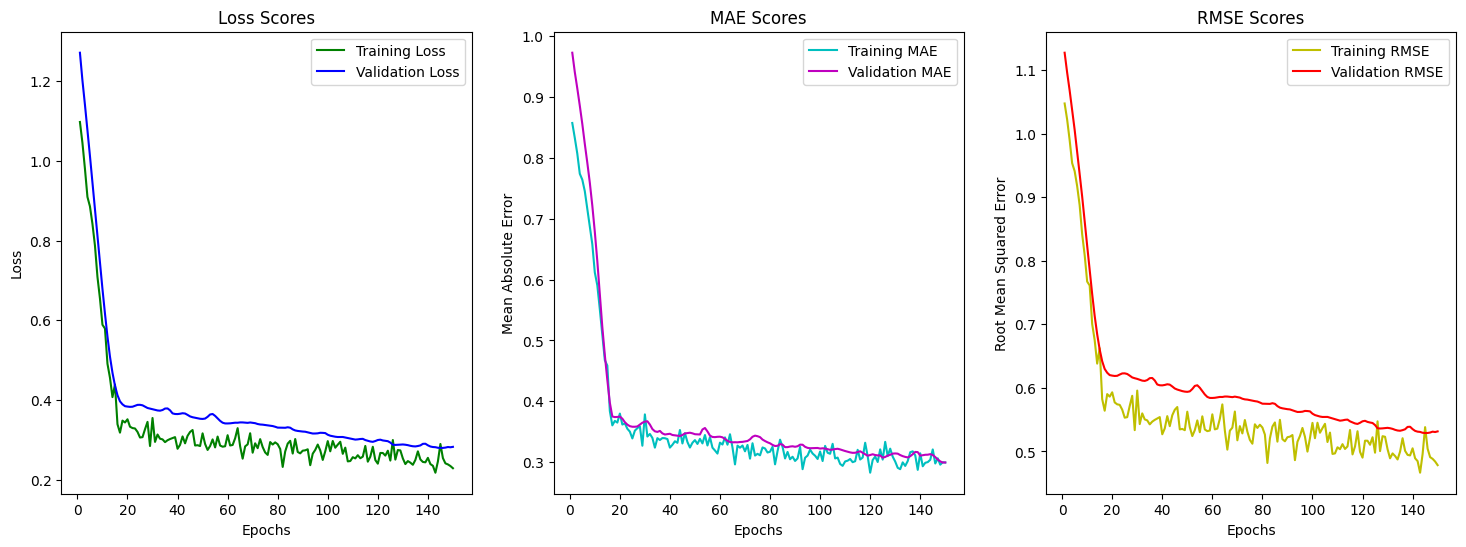

In [14]:
plot_loss_metrics(model_results)

<p style="color: #C837A0;">The training and validation graphs illustrate the learning process of the model over 150 epochs. The three subplots show the progression of loss, mean absolute error (MAE), and root mean squared error (RMSE) for both the training and validation sets. </p>
<ul style="color: #C837A0;">
        <ul>
            <li><b> Loss Scores:</b> The training loss (green line) and validation loss (blue line) both decrease significantly during the initial epochs, indicating that the model is learning and improving its predictions. The training loss stabilizes around 0.2, while the validation loss stabilizes around 0.3. The close proximity of the training and validation loss curves suggests that the model is not overfitting significantly, as both curves follow a similar trend and stabilize without diverging.</li>
            <li><b>MAE Scores:</b> The parallel trend of the MAE curves indicates consistent performance on both training and validation sets, reinforcing the absence of significant overfitting.</li>
            <li><b>Root Mean Squared Error (RMSE):</b> The close alignment of the RMSE curves confirms that the model is performing similarly on both the training and validation data, with minimal overfitting.</li>
        </ul>

In [15]:
train_loss, train_mae, train_rmse = model.evaluate(X_train, y_train)
test_loss, test_mae, test_rmse = model.evaluate(X_test, y_test)

print(f'Training Loss: {train_loss:.4f}, MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}')
print(f'Test Loss: {test_loss:.4f}, MAE: {test_mae:.4f}, RMSE: {test_rmse:.4f}')

2/2 [==============================] - 0s 2ms/step - loss: 0.4277 - mean_absolute_error: 0.3777 - root_mean_squared_error: 0.6540
Training Loss: 0.2226, MAE: 0.2626, RMSE: 0.4718
Test Loss: 0.4277, MAE: 0.3777, RMSE: 0.6540


<p style="color: #C837A0;">These metrics show the model's performance on both the training and test sets. The training metrics are lower than the test metrics, which is expected since the model is directly trained on the training data. The relatively small gap between training and test metrics indicates good generalization and minimal overfitting. The values for MAE and RMSE provide insight into the average error and the magnitude of the error, respectively, with the test MAE of 0.3777 and RMSE of 0.6540 indicating that the model performs reasonably well on unseen data.</p>

In [16]:
# Make predictions
predictions_scaled = model.predict(X_test)

# Inverse transform the predictions to original scale
predictions = y_scalar_value.inverse_transform(predictions_scaled)
y_test_original = y_scalar_value.inverse_transform(y_test)

2/2 [==============================] - 0s 1ms/step


<p style="color: #C837A0;">The low values for MAE and RMSE indicate that the model's predictions are very close to the actual values, with minimal error. The R-squared value of 0.7121 suggests that approximately 71.21% of the variance in the target variable is explained by the model, indicating a strong fit. These results demonstrate that the model performs well in predicting the specific fuel consumption at cruise conditions.</p>

Mean Absolute Error (MAE): 0.0103
Root Mean Squared Error (RMSE): 0.0178
R-squared (R2 ): 0.7121


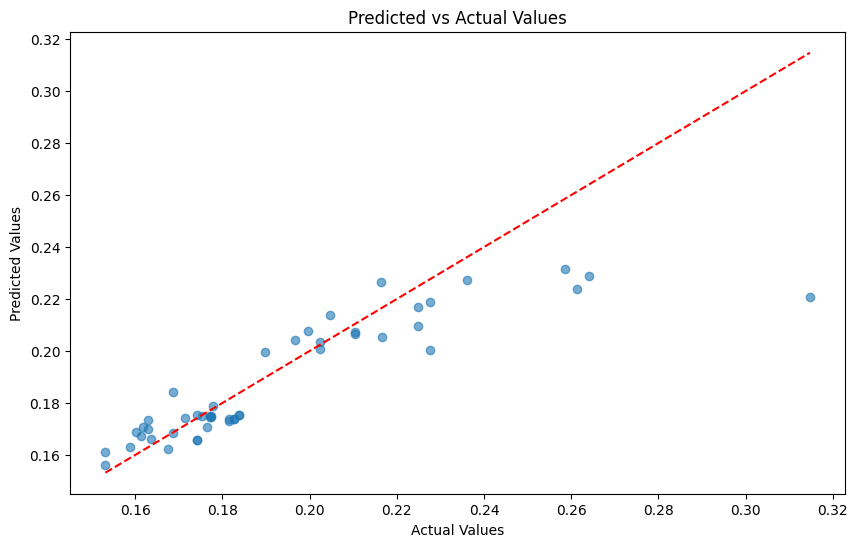

In [18]:
evaluate_regression_model(y_test_original, predictions)

In [19]:
model.save('SFC_Cruise_kg_s_N_inital_model')


INFO:tensorflow:Assets written to: SFC_Cruise_kg_s_N_inital_model/assets


INFO:tensorflow:Assets written to: SFC_Cruise_kg_s_N_inital_model/assets


In [21]:
results_df = pd.DataFrame({
    'Actual': y_test_original.flatten(),
    'Predicted': predictions.flatten(),
})

# Calculate the residuals
results_df['Residual'] = abs(results_df['Actual'] - results_df['Predicted'])

# Lower residuals indicate higher confidence. For simplicity, we can use the inverse of residuals
# You may normalize the confidence if needed
results_df['Confidence'] = 1 / (1 + results_df['Residual'])

# Sort the DataFrame by confidence if you want to see the highest confidence predictions first
results_df = results_df.sort_values(by='Confidence', ascending=False)

# Display the DataFrame
print(results_df)

     Actual  Predicted  Residual  Confidence
30  0.16861   0.168351  0.000259    0.999741
9   0.17535   0.174860  0.000490    0.999510
2   0.17788   0.178645  0.000765    0.999236
46  0.17423   0.175171  0.000941    0.999060
1   0.20233   0.203326  0.000996    0.999005
8   0.20233   0.200564  0.001766    0.998237
23  0.17704   0.174857  0.002183    0.997822
29  0.17704   0.174743  0.002297    0.997708
42  0.17732   0.174957  0.002363    0.997643
24  0.16355   0.165964  0.002414    0.997592
38  0.17142   0.174125  0.002705    0.997302
44  0.17732   0.174489  0.002831    0.997177
12  0.15315   0.156004  0.002854    0.997154
14  0.21048   0.207214  0.003266    0.996745
41  0.21048   0.206395  0.004085    0.995932
15  0.15877   0.162971  0.004201    0.995816
45  0.16748   0.162448  0.005032    0.994993
16  0.17648   0.170816  0.005664    0.994368
28  0.16130   0.167086  0.005786    0.994248
7   0.16299   0.169813  0.006823    0.993223
3   0.19671   0.204361  0.007651    0.992407
47  0.1815

<p style="color: #C837A0;">To evaluate the model's confidence in its predictions, the residuals (absolute differences between actual and predicted values) were calculated, and a confidence score was derived. </p>

<p style="color: #C837A0;"> The DataFrame of results, sorted by confidence, indicates that the model is highly confident in predictions with low residuals. For example, the highest confidence score of 0.999741 corresponds to an actual value of 0.16861 and a predicted value of 0.168351, with a residual of only 0.000259. Lower residuals correspond to higher confidence, and the results show a range of confidence scores from very high to moderately high.</p>

<p style="color: #C837A0;"> Overall, this analysis confirms that the model performs well, with high accuracy and confidence in its predictions, and minimal overfitting. These findings suggest that the model is reliable for predicting specific fuel consumption at cruise conditions, and further improvements can be made by fine-tuning hyperparameters or exploring different model architectures</p>

#### <font style="color: #F4128A;"> <strong>SVR</strong></font>

In [74]:
features = ['Takeoff_Thrust_N', 'Thrust_Cruise_N', 'OPR_Sea_lvl', 'BPR', 'Mach_Number', 'Number_of_spools']
target = 'SFC_Cruise_kg_s_N'

X_train, X_test, y_train, y_test, x_scalar_value, y_scalar_value = prep_model_data(sfc_cruise, features, target, 0.15, 42, model_type='svr')

Input training size: (203, 6)
 Input test size: (36, 6)
 Labels for training size: (203,)
 Labels for testing size: (36,)


In [122]:
def evaluate_model(y_test_scaled, y_pred_scaled, y_scaler):
    """
    Evaluate the performance of a regression model by calculating MAE, RMSE, and R² score.
    
    Args:
    y_test_scaled (np.ndarray): Scaled true target values.
    y_pred_scaled (np.ndarray): Scaled predicted target values.
    y_scaler (StandardScaler): Scaler used to inverse transform the target values.

    Returns:
    dict: Dictionary containing MAE, RMSE, and R² score.
    """
    # Inverse transform the predictions and actual values
    y_pred = y_scaler.inverse_transform(y_pred_scaled)
    y_test_original = y_scaler.inverse_transform(y_test_scaled)

    # Calculate metrics
    mae = mean_absolute_error(y_test_original, y_pred)
    rmse = mean_squared_error(y_test_original, y_pred, squared=False)
    r2 = r2_score(y_test_original, y_pred)
    
    # Return the metrics in a dictionary
    return mae, rmse, r2, y_pred, y_test_original





def evaluate_model_confidence(y_test, y_pred):

    """
    Evaluate the performance of a model by calculating the confidence score.

    Args:
    y_test (np.ndarray): Test dataset
    y_pred (np.ndarray): Predicted values

    Returns:
    pd.DataFrame: DataFrame containing the actual, predicted, residual, and confidence scores.
    float: Average confidence score
    
    """
    
    results_df = pd.DataFrame({
        'Actual': y_test.flatten(),
        'Predicted': y_pred.flatten(),
    })

    # Calculate the residuals
    results_df['Residual'] = abs(results_df['Actual'] - results_df['Predicted'])

    # Calculate confidence scores
    results_df['Confidence'] = 1 / (1 + results_df['Residual'])

    # Calculate average confidence
    avg_confidence = results_df['Confidence'].mean() * 100  # Convert to percentage

    # Sort the DataFrame by confidence
    results_df = results_df.sort_values(by='Confidence', ascending=False)

    # Print the metrics and average confidence
    print(f'Average Confidence: {avg_confidence:.2f}%')

    return results_df, avg_confidence

In [130]:
# Train the SVR model with a polynomial kernel
svr = SVR(kernel='linear')
svr.fit(X_train, y_train.ravel())

# Predict on the test set
y_pred_scaled = svr.predict(X_test).reshape(-1, 1)


mae, rmse, r2, y_pred, y_test_original = evaluate_model(y_test, y_pred_scaled, y_scalar_value)
print(f'Mean Absolute Error: {mae:.4f}\nRoot Mean Squared Error: {rmse:.4f}\nR^2 Score: {r2:.4f}')

Mean Absolute Error: 0.0110
Root Mean Squared Error: 0.0183
R^2 Score: 0.6957


In [131]:
results_df_svr, avg_confidence = evaluate_model_confidence(y_test_original, y_pred)
results_df_svr

Average Confidence: 98.93%


,Actual,Predicted,Residual,Confidence
44,0.17732,0.177214,0.000106,0.999894
25,0.22481,0.224547,0.000263,0.999737
39,0.18153,0.182005,0.000475,0.999525
38,0.17142,0.171958,0.000538,0.999463
23,0.17704,0.176212,0.000828,0.999172
2,0.17788,0.176925,0.000955,0.999046
42,0.17732,0.176270,0.001050,0.998951
6,0.22481,0.223482,0.001328,0.998674
29,0.17704,0.178705,0.001665,0.998338
41,0.21048,0.212958,0.002478,0.997529


In [132]:
results_df_svr.to_excel('Results/SFC_Cruise_kg_s_N Inital_Predictions/SVR_Confidence_Scores.xlsx')


In [128]:
#Save the model
with open('Models & Results/SFC_Cruise_kg_s_N/Initial_Predictions/SFC_Cruise_kg_s_N_SVR.pkl', 'wb') as file:
    pickle.dump(svr, file)


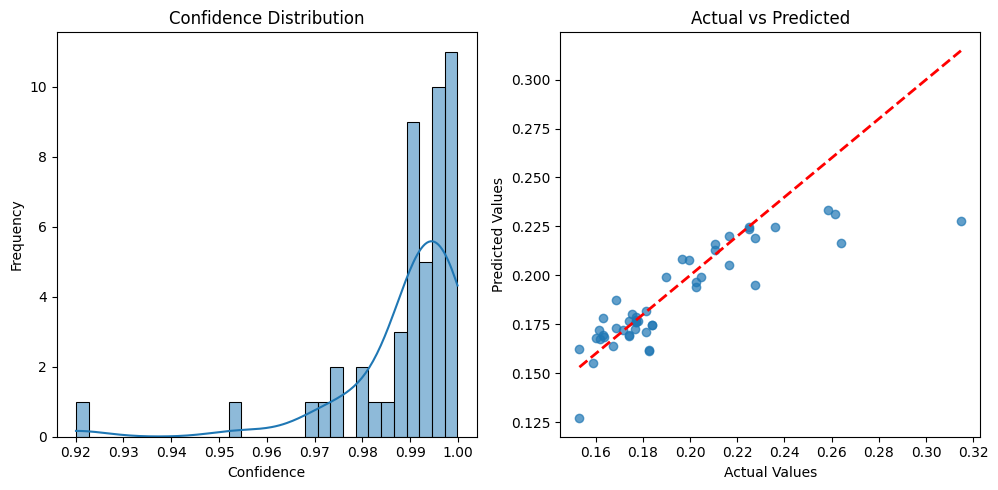

In [138]:
# Plotting Confidence Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(results_df_svr['Confidence'], kde=True, bins=30)
plt.title('Confidence Distribution')
plt.xlabel('Confidence')
plt.ylabel('Frequency')

# Plotting Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(results_df_svr['Actual'], results_df_svr['Predicted'], alpha=0.7)
plt.plot([results_df_svr['Actual'].min(), results_df_svr['Actual'].max()], 
         [results_df_svr['Actual'].min(), results_df_svr['Actual'].max()], 
         'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

#### <font style="color: #F4128A;"> <strong>Random Forest Regression</strong></font>

In [151]:
features = ['Takeoff_Thrust_N', 'Thrust_Cruise_N', 'OPR_Sea_lvl', 'BPR', 'Mach_Number', 'Number_of_spools']
target = 'SFC_Cruise_kg_s_N'

X_train, X_test, y_train, y_test, x_scalar_value, y_scalar_value = prep_model_data(sfc_cruise, features, target, 0.2, 42, model_type='svr')

Input training size: (191, 6)
 Input test size: (48, 6)
 Labels for training size: (191,)
 Labels for testing size: (48,)


In [152]:
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=30
    
)
rf_regressor.fit(X_train, y_train.ravel())

# Predict on the test set
rf_y_pred_scaled = rf_regressor.predict(X_test).reshape(-1, 1)


mae_rf, rmse_rf, r2_rf, y_pred_rf, y_test_original_rf = evaluate_model(y_test, rf_y_pred_scaled, y_scalar_value)
print(f'Mean Absolute Error: {mae_rf:.4f}\nRoot Mean Squared Error: {rmse_rf:.4f}\nR^2 Score: {r2_rf:.4f}')

Mean Absolute Error: 0.0096
Root Mean Squared Error: 0.0222
R^2 Score: 0.5551


In [153]:
results_df_rf, avg_confidence_rf = evaluate_model_confidence(y_test_original_rf, y_pred_rf)
results_df_rf

Average Confidence: 99.08%


,Actual,Predicted,Residual,Confidence
11,0.21638,0.216380,8.326673e-17,1.000000
23,0.17704,0.177026,1.410000e-05,0.999986
46,0.17423,0.174354,1.236000e-04,0.999876
42,0.17732,0.177624,3.039000e-04,0.999696
1,0.20233,0.202808,4.777000e-04,0.999523
24,0.16355,0.164309,7.587000e-04,0.999242
47,0.18153,0.180387,1.143300e-03,0.998858
26,0.22762,0.226450,1.170400e-03,0.998831
31,0.19952,0.198331,1.189200e-03,0.998812
10,0.16186,0.160666,1.193800e-03,0.998808


In [142]:
results_df_rf.to_excel('Results/SFC_Cruise_kg_s_N Inital_Predictions/RF_Confidence_Scores.xlsx')


In [143]:
with open('Models & Results/SFC_Cruise_kg_s_N/Initial_Predictions/SFC_Cruise_kg_s_N_RF.pkl', 'wb') as file:
    pickle.dump(svr, file)

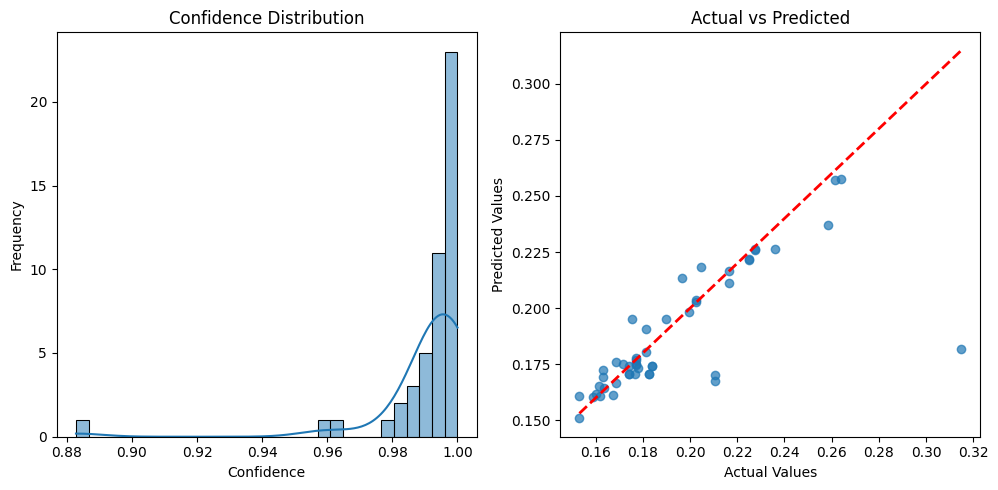

In [145]:
# Plotting Confidence Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(results_df_rf['Confidence'], kde=True, bins=30)
plt.title('Confidence Distribution')
plt.xlabel('Confidence')
plt.ylabel('Frequency')

# Plotting Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(results_df_rf['Actual'], results_df_rf['Predicted'], alpha=0.7)
plt.plot([results_df_rf['Actual'].min(), results_df_rf['Actual'].max()], 
         [results_df_rf['Actual'].min(), results_df_rf['Actual'].max()], 
         'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

#### <font style="color: #F4128A;"> <strong>Esemble Learning</strong></font>

In [149]:
features = ['Takeoff_Thrust_N', 'Thrust_Cruise_N', 'OPR_Sea_lvl', 'BPR', 'Mach_Number', 'Number_of_spools']
target = 'SFC_Cruise_kg_s_N'

X_train, X_test, y_train, y_test, x_scalar_value, y_scalar_value = prep_model_data(sfc_cruise, features, target, 0.2, 42, model_type='svr')

Input training size: (191, 6)
 Input test size: (48, 6)
 Labels for training size: (191,)
 Labels for testing size: (48,)


In [155]:
# Define the individual models
dt_regressor = DecisionTreeRegressor(random_state=42)
svr_regressor = SVR(kernel='linear')
linear_regressor = LinearRegression()

#Also add Logistics Regression

# Fit the individual models
dt_regressor.fit(X_train, y_train.ravel())
svr_regressor.fit(X_train, y_train.ravel())
linear_regressor.fit(X_train, y_train.ravel())

# Create the Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('dt', dt_regressor),
    ('svr', svr_regressor),
    ('linear', linear_regressor)
])

# Train the Voting Regressor
voting_regressor.fit(X_train, y_train.ravel())

# Predict on the test set
y_pred_voting = voting_regressor.predict(X_test).reshape(-1, 1)

mae_esemble, rmse_esemble, r2_esemble, y_pred_esemble, y_test_original_esemble = evaluate_model(y_test, y_pred_voting, y_scalar_value)
print(f'Mean Absolute Error: {mae_esemble:.4f}\nRoot Mean Squared Error: {rmse_esemble:.4f}\nR^2 Score: {r2_esemble:.4f}')


Mean Absolute Error: 0.0106
Root Mean Squared Error: 0.0202
R^2 Score: 0.6309


In [157]:
results_df_esemble, avg_confidence_esemble = evaluate_model_confidence(y_test_original_esemble, y_pred_esemble)
results_df_esemble

Average Confidence: 98.98%


,Actual,Predicted,Residual,Confidence
38,0.17142,0.171393,0.000027,0.999973
15,0.15877,0.158737,0.000033,0.999967
44,0.17732,0.177668,0.000348,0.999652
42,0.17732,0.176964,0.000356,0.999644
23,0.17704,0.176670,0.000370,0.999630
29,0.17704,0.177700,0.000660,0.999341
39,0.18153,0.182441,0.000911,0.999090
25,0.22481,0.223439,0.001371,0.998631
6,0.22481,0.223193,0.001617,0.998385
11,0.21638,0.218171,0.001791,0.998212


In [158]:
results_df_esemble.to_excel('Results/SFC_Cruise_kg_s_N Inital_Predictions/Esemble_Confidence_Scores.xlsx')

In [159]:
with open('Models & Results/SFC_Cruise_kg_s_N/Initial_Predictions/SFC_Cruise_kg_s_N_Esemble.pkl', 'wb') as file:
    pickle.dump(svr, file)

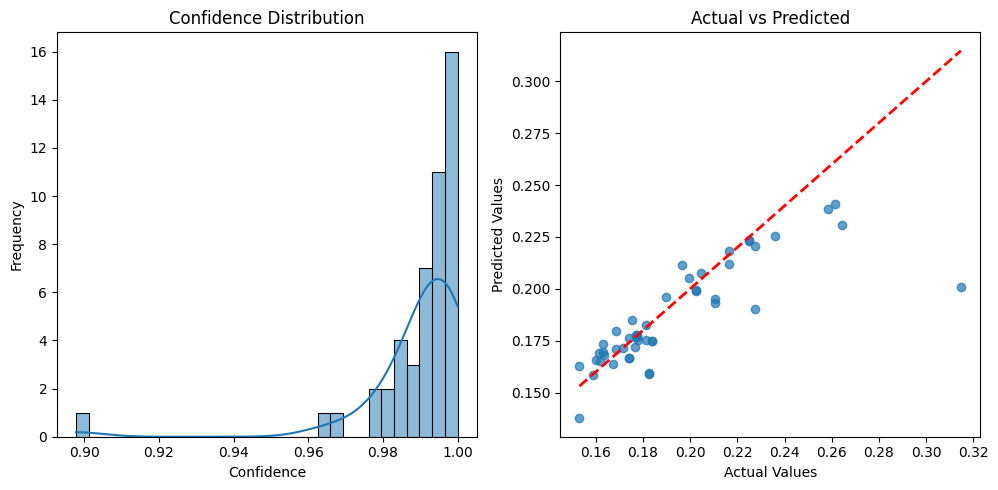

In [160]:
# Plotting Confidence Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(results_df_esemble['Confidence'], kde=True, bins=30)
plt.title('Confidence Distribution')
plt.xlabel('Confidence')
plt.ylabel('Frequency')

# Plotting Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(results_df_esemble['Actual'], results_df_esemble['Predicted'], alpha=0.7)
plt.plot([results_df_esemble['Actual'].min(), results_df_esemble['Actual'].max()], 
         [results_df_esemble['Actual'].min(), results_df_esemble['Actual'].max()], 
         'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

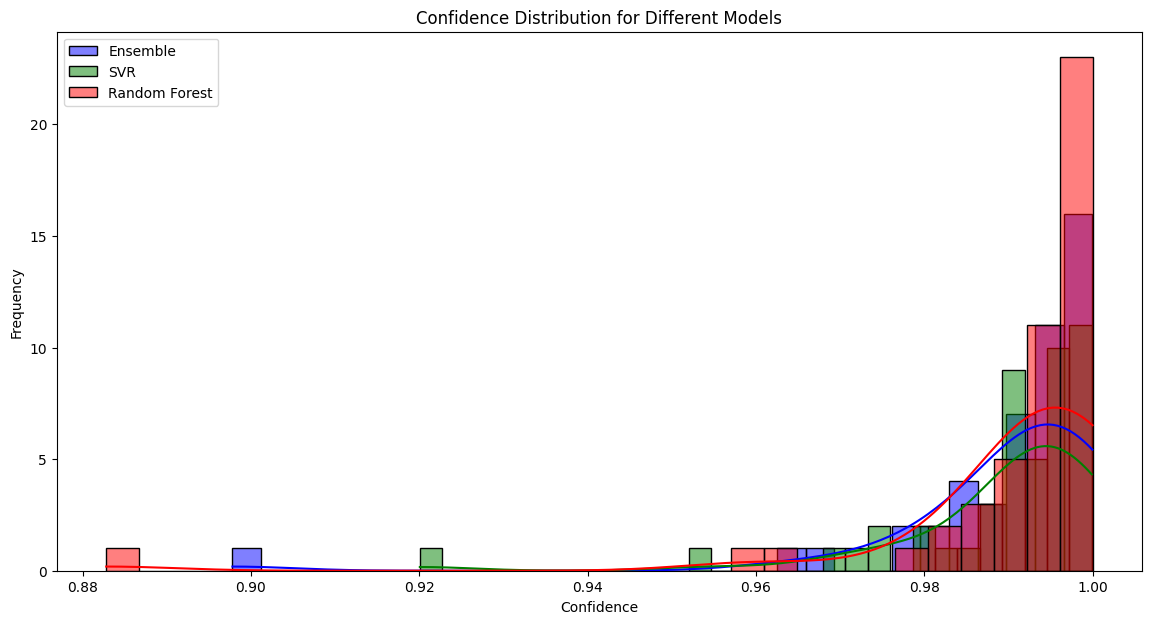

In [161]:
plt.figure(figsize=(14, 7))

# Plotting Confidence Distribution for Ensemble Model
sns.histplot(results_df_esemble['Confidence'], kde=True, bins=30, color='blue', label='Ensemble', alpha=0.5)

# Plotting Confidence Distribution for SVR Model
sns.histplot(results_df_svr['Confidence'], kde=True, bins=30, color='green', label='SVR', alpha=0.5)

# Plotting Confidence Distribution for Random Forest Model
sns.histplot(results_df_rf['Confidence'], kde=True, bins=30, color='red', label='Random Forest', alpha=0.5)

plt.title('Confidence Distribution for Different Models')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.legend()

plt.show()

<p style="color: #C837A0;">The evaluation of the three regression models—Support Vector Regression (SVR), Random Forest Regressor, and Ensemble Learning—reveals their effectiveness in predicting the target variable. The key performance metrics for each model, including Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), R² score, and average confidence, are summarized below:</p>

<ul style="color: #C837A0;">
  <li><strong>Support Vector Regression (SVR):</strong>
    <ul>
      <li>Mean Absolute Error: 0.0110</li>
      <li>Root Mean Squared Error: 0.0183</li>
      <li>R² Score: 0.6957</li>
      <li>Average Confidence: 98.93%</li>
    </ul>
  </li>
  <li><strong>Random Forest Regressor:</strong>
    <ul>
      <li>Mean Absolute Error: 0.0096</li>
      <li>Root Mean Squared Error: 0.0222</li>
      <li>R² Score: 0.5551</li>
      <li>Average Confidence: 99.08%</li>
    </ul>
  </li>
  <li><strong>Ensemble Learning:</strong>
    <ul>
      <li>Mean Absolute Error: 0.0106</li>
      <li>Root Mean Squared Error: 0.0202</li>
      <li>R² Score: 0.6309</li>
      <li>Average Confidence: 98.98%</li>
    </ul>
  </li>
</ul>

<h3 style="color: #C837A0;">Detailed Analysis</h3>

<p style="color: #C837A0;">All three models demonstrated high performance with respect to MAE and RMSE. These metrics indicate that the models were able to make predictions very close to the actual values. The low MAE and RMSE scores suggest that the errors between the predicted and actual values were minimal, reflecting the models' precision.</p>

<p style="color: #C837A0;">However, the R² scores for all three models were relatively low despite their high confidence scores. The R² score, or coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A low R² score, even with high confidence and low error metrics, suggests that while the models can make accurate predictions, they may not be capturing all the variability in the data. This can happen due to several reasons:</p>

<ul style="color: #C837A0;">
  <li><strong>Model Complexity and Data Variability:</strong> The models might be highly tuned to the training data, capturing specific patterns well but not generalizing all aspects of the data variability. This is a common occurrence in scenarios with limited data points or when the underlying relationships in the data are complex.</li>
  <li><strong>Feature Selection:</strong> The selected features might not encompass all the factors influencing the target variable, leading to unexplained variance. This indicates the potential benefit of exploring additional features or more complex interactions between existing features.</li>
  <li><strong>Noise in Data:</strong> There might be inherent noise in the data that the models cannot account for, reducing the R² score. This noise can obscure the relationship between the features and the target variable, affecting the model's ability to explain the variance fully.</li>
</ul>

<h3 style="color: #C837A0;">Confidence Scores Analysis</h3>

<p style="color: #C837A0;">The high average confidence scores for all models—98.93% for SVR, 99.08% for Random Forest, and 98.98% for Ensemble Learning—indicate that the models' predictions were consistently close to the actual values. Confidence scores are inversely related to residuals, where lower residuals translate to higher confidence scores. The confidence distribution plot (shown in the image) reflects that most predictions across all models were made with high confidence.</p>

<h3 style="color: #C837A0;">Comparative Performance</h3>

<ul style="color: #C837A0;">
  <li><strong>Random Forest Regressor:</strong> Despite having the highest average confidence (99.08%) and the lowest MAE (0.0096), the Random Forest model had the lowest R² score (0.5551). This suggests that while it made very accurate predictions, it struggled more with explaining the variance in the target variable compared to the other models.</li>
  <li><strong>Support Vector Regression (SVR):</strong> SVR achieved a higher R² score (0.6957) than Random Forest, indicating a better ability to explain the variance in the data. However, it had a slightly higher MAE (0.0110) and RMSE (0.0183), reflecting slightly larger prediction errors on average.</li>
  <li><strong>Ensemble Learning:</strong> The ensemble model, combining the strengths of multiple models, achieved balanced performance with an R² score of 0.6309, MAE of 0.0106, and RMSE of 0.0202. Its average confidence (98.98%) was slightly lower than Random Forest but still indicative of high prediction accuracy.</li>
</ul>

<p style="color: #C837A0;">Overall, while Random Forest showed the highest confidence, indicating very close predictions to actual values, SVR demonstrated a better balance in explaining the variance within the data. Ensemble Learning provided a robust performance by leveraging the strengths of multiple models, making it a reliable choice for prediction with balanced metrics. The confidence plot corroborates these findings, showcasing high confidence across all models with slight variations reflective of their respective performance nuances.</p>


### <font style="color: #12F4B3;"> <strong>Impute Missing Values of Selected Parameters</strong></font>

### <font style="color: #12F4B3;"> <strong>Comprehensive Prediction Using All Parameters:</strong></font>